# Section1: 強化学習

### 要点のまとめ

- 行動の結果として得られる利益をもとに、行動決定の原理を改善する仕組み
- 強化学習では、データの探索が足りない状態とデータの利用が足りない状態のトレードオフが重要
- 教示ありやなし学習がデータからパターンを見つけて予測することを目標にするのに対して、強化学習は優れた方策を見つけることを目標とする
- 価値関数のうち、エージェントの行動と環境の状態を組み合わせる行動価値関数がよく使われる
- 方策関数は、ある状態でどのような行動を採るかの確率を与える関数
- 方策勾配法は、方策をモデル化して最適化する手法
  - 方策の良さを表すJの定義方法：
    - 平均報酬
    - 割引報酬和
  - $ \theta^{(t+1)} = \theta^{(t)} + \epsilon \nabla J(\theta)  $
  - 方策勾配定理
   $ \nabla_{\theta}J(\theta) = E_{\pi_{\theta}} \left[ \left( \nabla log \pi_{\theta}(a|s)Q^{\pi}(s,a) \right) \right] $

# Section2: AlphaGo

### 要点のまとめ

- Alpha Go (Lee)とAlpha Go Zeroの2種類
- Alpha Goは、PolicyNet、ValueNet、RolloutPolicyで構成される
- Alpha GOの学習は次の3ステップ：
  1. 教師あり学習によるRolloutPolicyとPolicyNetの学習
  2. 強化学習によるPolicyNetの学習
  3. 強化学習によるValueNetの学習
- Alpha Goはモンテカルロ木探索で検討する局面の探索木を成長させる
  - 選択、評価、バックアップ、成長という4つのステップ
- Alpha GoとAlpha Go Zeroの違い：
  - 強化学習のみで作成
  - 特徴入力からヒューリスティックな要素を排除
  - PolicyNetとValueNetを統合
  - ResidualNetを導入
  - モンテカルロ木探索からRollOutシミュレーションを削除
- ResidualNetは、ショートカット構造を追加して、勾配の爆発・消失を抑える効果を狙ったもの。<br>ResidualNetの工夫として以下がある：
  - Residual Blockの工夫
    - Bottleneck <br>
    1X1カーネルのConvolutionを利用して、利用して、1層目で次元削減、、3層目で次元復元するする3層構造。。2層に対して、計算量が同等で同等で1層増やせるメリット

    - PreActivation <br>
    並びをBatchNorm→ReLu→Convolution→BatchNorm→ReLU→Convolution→Addとすることで、性能が上昇

  - ネットワーク構造の工夫
    - WideResNet <br>
      Convolutionのフィルタ数をk倍に増やしたResNet。浅い層数でも深い層数と同等以上の精度
    - PyramidNet <br>
      段階的ではなく、各層でフィルタ数を増やしていく増やしていくResNet。WideResNetで幅が広がった直後の層に過度の負担がかかって精度低下することの対策
- Alpha Go Zeroのモンテカルロ木探索は、選択、評価および成長、バックアップの3つステップ
- Alpha Go Zeroの学習は次の次の3ステップ：
  1. 自己対局による教師データの作成
  2. 作成した教師データで学習
  3. ネットワークの更新
  



# Section3: 軽量化・高速化技術

### 要点のまとめ

- 分散深層学習は、複数の計算資源(ワーカー)を使用して、並列的にNNを構成する
- 並列化には、データ並列化、モデル並列化がある
- データ並列化
  - 同期型：各ワーカーの計算が終わるを待つ
  - 非同期型：各ワーカーはお互いの計算が終わるのを待たない
  - 処理スピードは非同期型の方が早い
  - 非同期型は最新のモデルのパラメータを利用できないので、学習が不安定になりやすい(Stable Gradient Problem)
  - 現行は精度の良いことが多い同期型が主流
- モデル並列化
  - モデルを分割して、すべてのデータで学習が終わった後で、1つのモデルに復元する
  - モデルのパラメータ数が多いほど、スピードアップの効率が向上
- モデルが大きいときはモデル並列化、データが多いときはデータ並列化を、まず検討する
- GPUによる高速化
  - 複雑で連続的な処理が得意なCPUに対して、GPUは簡単な並列処理が得意。NNの学習は単純な行列演算が多いので、GPUによる高速化が可能
  - GPGPUの開発環境は以下がある：
    - CUDA <br>
      NVDIA社が開発するGPUのみで使用可能、深層学習用に提供されているので使いやすい
    - OpenCL <br>
      NVDIA社のGPU以外でも使用可能、深層学習に特化しているわけではない
- モデル軽量化 <br>
  モデルの精度は維持しつつ、パラメータや演算回数を低減すること。計算の高速化や省メモリ化でモバイルやIoT機器と相性が良い。代表的な手法は、量子化、蒸留、プルーニングの3つ：
  - 量子化量子化 <br>
    パラメータをを64bit不動小数点からから32bitなど下位に精度を落とすこと。メモリと演算処理を削減できる
  - 蒸留 <br>
    規模の大きなモデルの知識を使い、軽量なモデルを作成すること。教師モデルと生徒モデルで構成。sくない学習回数で精度のよいモデルが作成できる
  - プルーニングプルーニング <br>
    モデルの精度に寄与が少ないニューロンを削減すること


# Section4: 応用モデル

### 要点のまとめ

- MobileNets
  - Depthwise ConvolutionとPoointwise Convolutionの組み合わせで軽量化を実現
    - Depthwise Convolution <br>
      チャネルごとに空間方向に畳み込む。入力特徴マップのサイズがHxWxC、カーネルがKxKとすると、出力マップの計算量はHxWxCxKxK
    - Pointwise Convolution <br>
      Depthwise Convolutionの出力をチャネル方向に畳み込む。出力マップの計算量は計算量はHxWxCxM

- DenseNet
  - CNNの一種
  - DenseBlockというモジュールを使って、ResNetのように前方の層から後方の層へアイデンティティ接続を介してパスを作る
  - DenseBlock内の各層では出力がkとなる処理を行う。このkをgrowth rateという
    - 最初の層の入力を$k_{0}$とすると、l番目の層の出力は$k_{0} + k(l-1)$
  - ResNetは前1層の入力のみが後方の層への入力となるのに対して、DenseNetでは前方の層からの出力全てが後方の層

- Batch Norm Layer
  - batch正規化はミニバッチ単位で実施するため、バッチサイズが小さいとき、学習が収束しないという問題がある
  - その対策として、Layer Normalization
    - Layer Norm <br>
      それぞれのサンプルすべてのピクセルが同一分布に従うように正規化。<br>
      入力データのスケール、重み行列のスケールやシフトの操作によって出力が変わらない
    - Instance Norm <br>
      さらにチャネルも同一分布に従うように正規化。<br>
      コントラストの正規化に寄与する。画像のスタイル転送やテクスチャ合成などで使用

- Wavenet
  - 音声の生成モデル
  - 時系列データに対して畳み込み畳み込み(Dilated convolution)を適用 <br>
    Dilated convolution <br>
    - 層が深くなるにつれて畳み込むリンクを離す
    - 受容野を簡単に増やすことができる

### 確認テスト

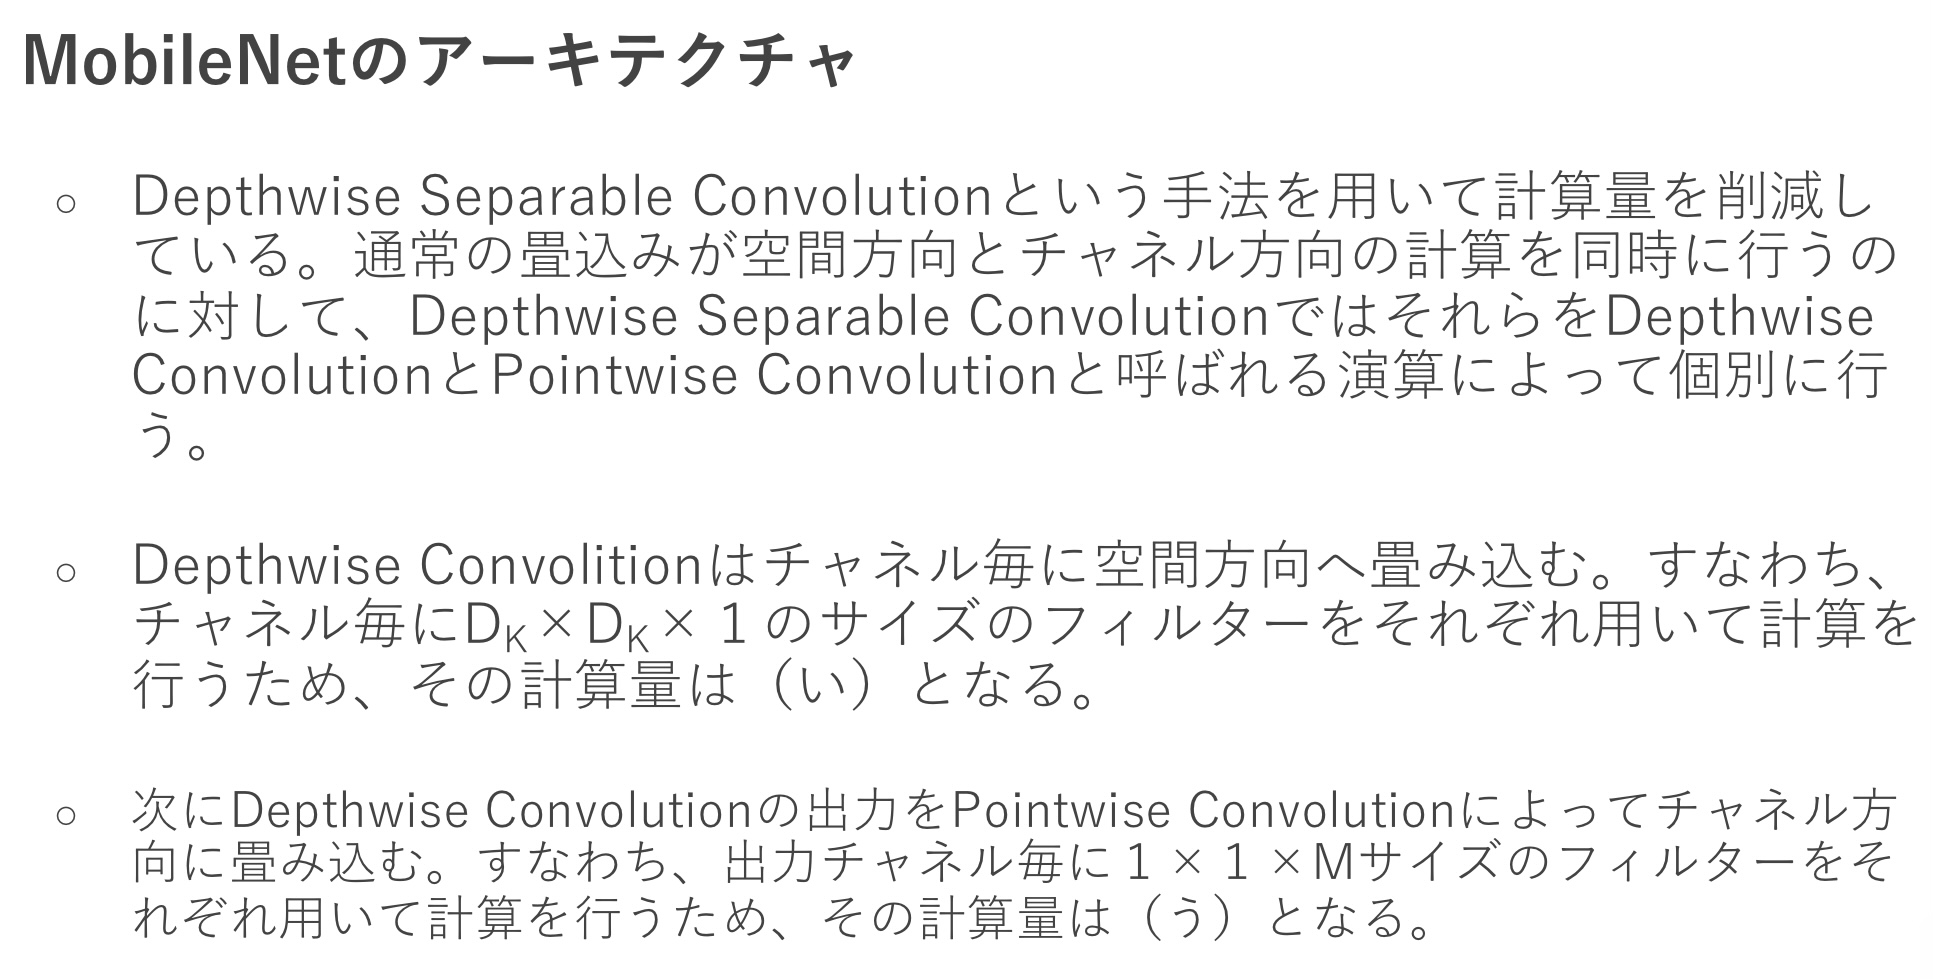

解答：画像サイズをサイズをHxW、チャネル数ををCとすると、(い)HxWxCx$D_{k}$x$D_{k}$ (う)HxWxCxM

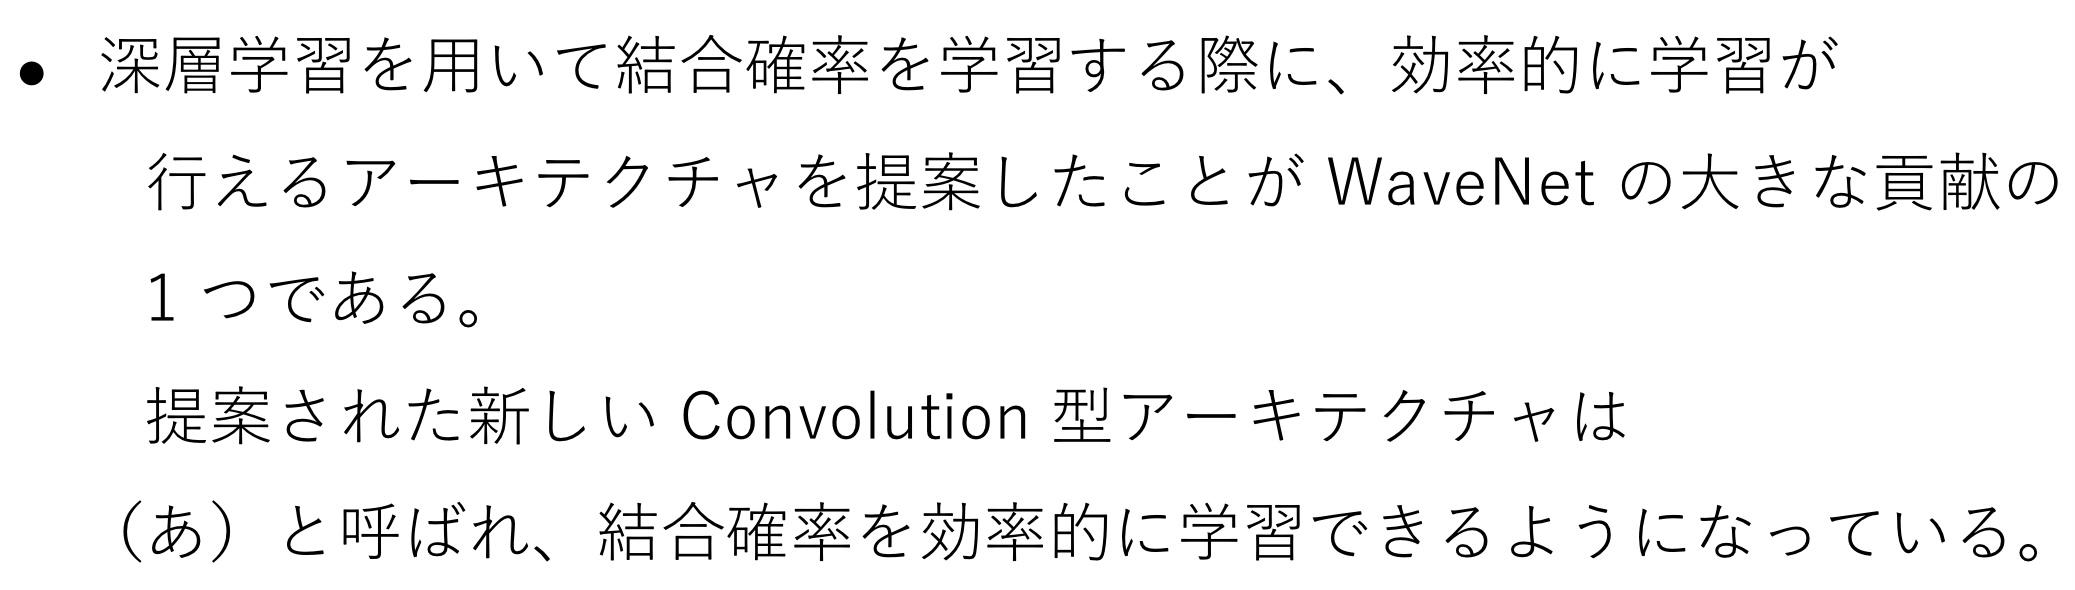

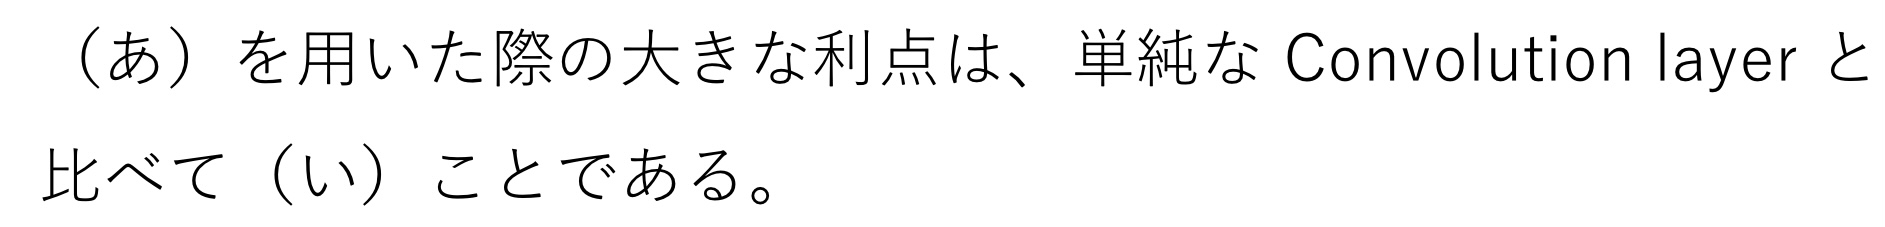

解答：(あ)Dilated causal convolution (い)パラメータに対する受容野が広い

# Section5: transformer

### 要点のまとめ

- Seq2seq <br>
  系列を入力として、系列を出力するもの。<br>
  言語モデルをふたつ連結した形。。<br>
  EncoderからDecoderに渡される内部状態が鍵となる鍵
- RNN <br>
  系列データを読み込むために再帰的に動作するNN
- 言語モデル <br>
  単語の並びに確率(文章としてどれだけ自然かという尤度)を与える。<br>
  数式的には同時確率を事後確率に分解して表せる。これを求めることがRNNの目標

- Transformer <br>
  ニューラル機械学習の翻訳は文の長さに弱いという問題がある。解決方法として提案されたのがTransformer。RNNはなく、Attentionを使う
  - Attention <br>
    - 翻訳先の各単語を選択する際に、翻訳元の文中の各単語の隠れ状態を利用
    - queryに一致するkeyを索引し、対応するvalueを取り出す操作というように、辞書オブジェクトに相当する
    - ソース・ターゲット注意機構と自己注意機構の2種類
    - Self-Attention(自己注意機構)が肝で、入力をすべて同じにして学習的に注意箇所を決めていく
  - Scaled dot product attention <br>
    全単語に関するAttentionをまとめて計算する
  - Multi-Head attention <br>
    重みパラメータの異なる8個のヘッドを使用。<br>
    8個の理由は、それぞれの注意機構が独自の注意のかけ方を学習して、総合することでいい感じの注意を実現するため
  - Encoder <br>
    自己注意機構により文脈を考慮して各単語をエンコード
  - Decoder <br>
    - 自己注意機構 <br>
      生成単語列の情報を収集。未来の情報は見ないようにマスクする
    - Encoder - Decoder attention <br>
      入力文の出力へのattention
  - Add & Norm
    - Add <br>
      入出力の差分を学習。学習とテストのエラー低減効果がある
    - Nrom <br>
      各層でバイアスを除く活性化関数への入力を平均0、分散1に正則化。学習を高速化する効果がある
  - Positional Encoding <br>
    RNNを用いないので単語列の語順情報を追加する必要がある。単語の位置情報をエンコード


### 確認テスト

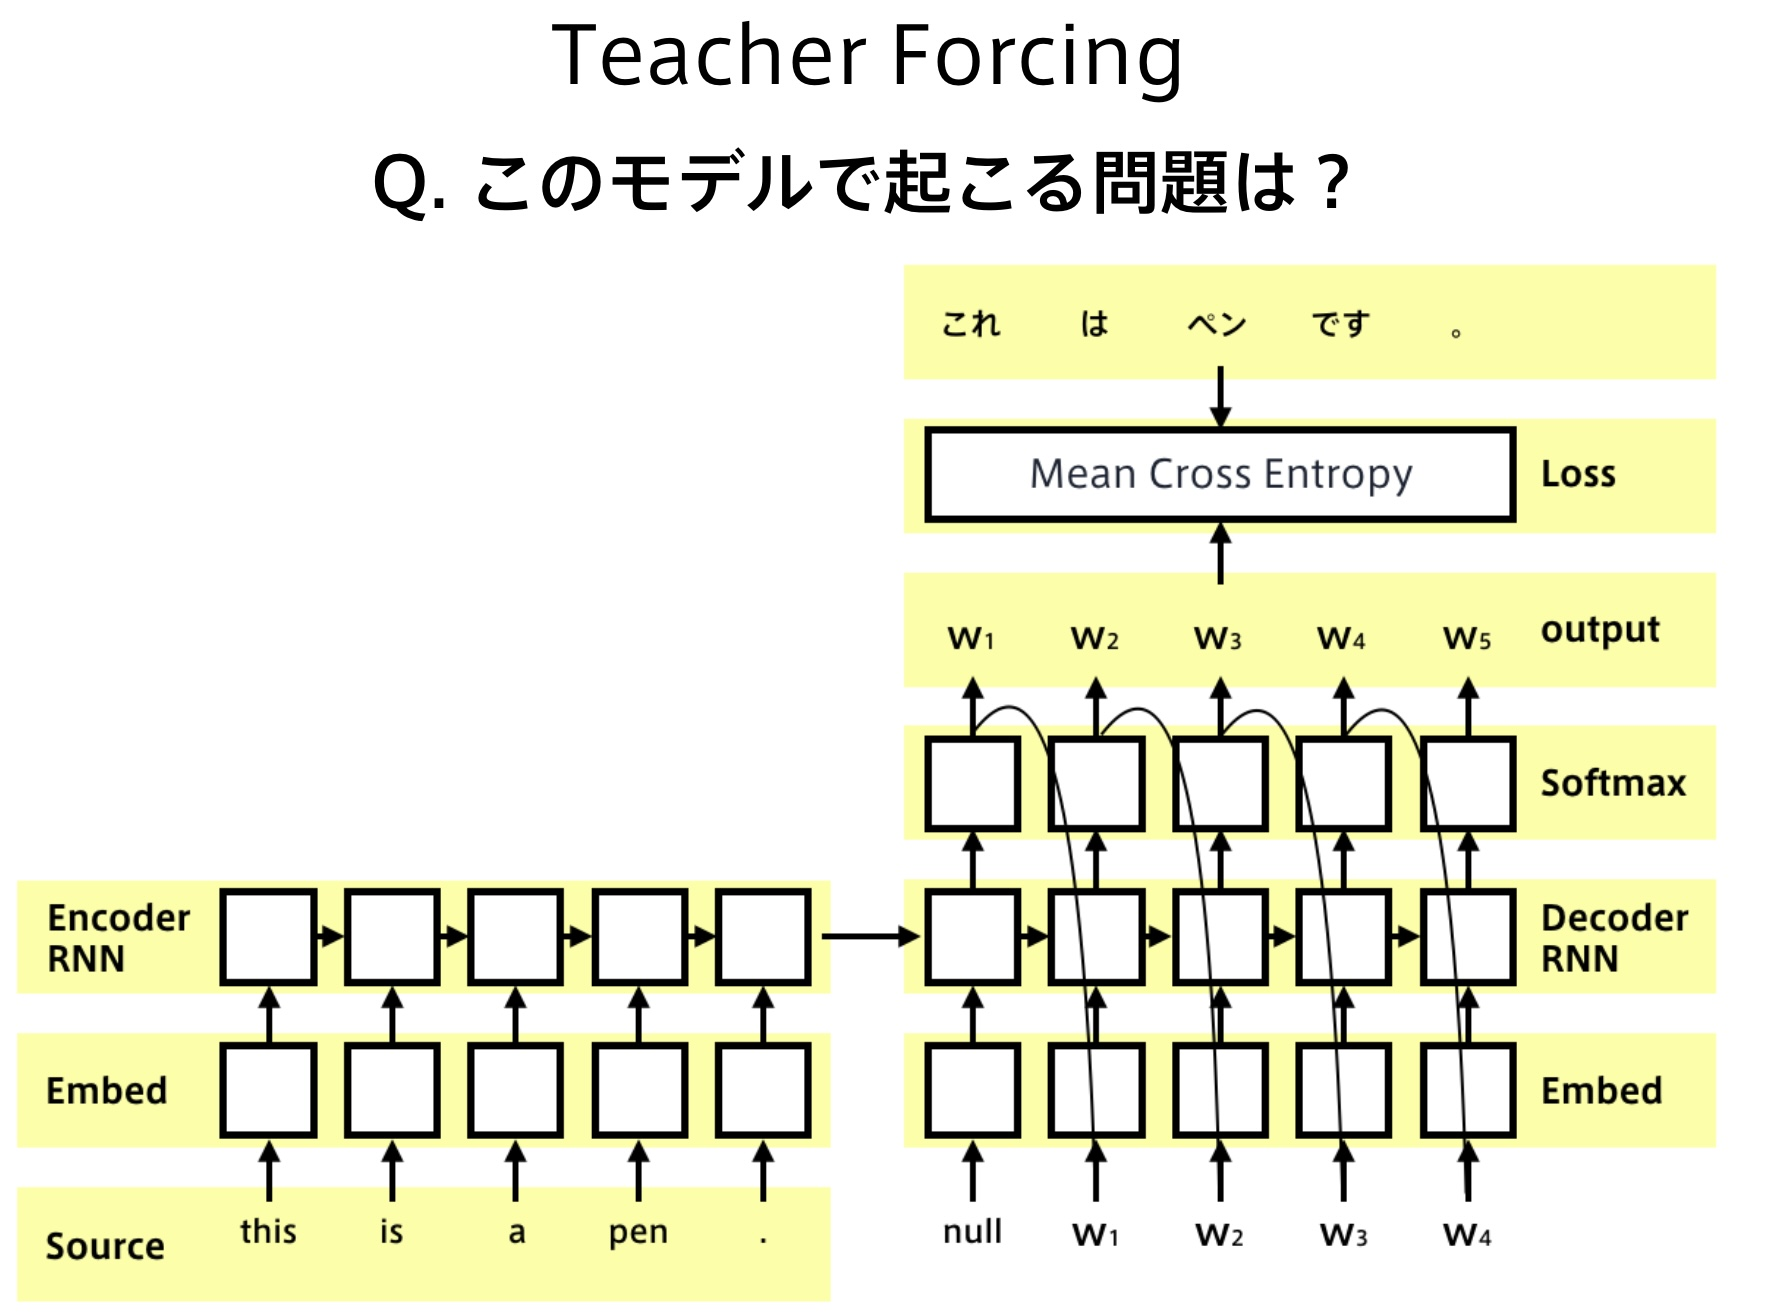

- 1つの間違いが後の時間まで連鎖していってしまう。<br>
  正解ラベルを直接Decoderの入力にすると解決するできる。<br>
  ただし、学習時とテスト時に環境が変わってしまうというデメリットがある

### 演習 Sequence-to-Sequence (Seq2Seq) モデル

In [ ]:
!pip install wheel==0.31.1

In [ ]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1.post2-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

     |████████████████████████████████| 89.4 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 0.4.1.post2 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 0.4.1.post2 which is incompatible.
fastai 1.0.61 requires torch>=1.0.0, but you have torch 0.4.1.post2 which is incompatible.
0.4.1.post2
False


In [ ]:
! wget https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
! mkdir images data

# data取得
! wget https://www.dropbox.com/s/o4kyc52a8we25wy/dev.en -P data/
! wget https://www.dropbox.com/s/kdgskm5hzg6znuc/dev.ja -P data/
! wget https://www.dropbox.com/s/gyyx4gohv9v65uh/test.en -P data/
! wget https://www.dropbox.com/s/hotxwbgoe2n013k/test.ja -P data/
! wget https://www.dropbox.com/s/5lsftkmb20ay9e1/train.en -P data/
! wget https://www.dropbox.com/s/ak53qirssci6f1j/train.ja -P data/

--2022-01-03 01:07:52--  https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9narw5x4uizmehh/utils.py [following]
--2022-01-03 01:07:52--  https://www.dropbox.com/s/raw/9narw5x4uizmehh/utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8bae180cad20f1588ab2675e1d.dl.dropboxusercontent.com/cd/0/inline/BdD_QjXZkQVdr3DvVaTealuZr5zSFif26M2f9pe1wBBIvkV_z9FViRZBr77CZe5fQBQ4tK7OFQLAWDgL4QG4lwgmSTp1gEKzvIdIm0TFMOV06dAX6jx9zbWCIBgoybk3OSnnwxMgGZzu7dwFa-OoQ0dI/file# [following]
--2022-01-03 01:07:53--  https://uc8bae180cad20f1588ab2675e1d.dl.dropboxusercontent.com/cd/0/inline/BdD_QjXZkQVdr3DvVaTealuZr5zSFif26M2f9pe1wBBIvkV_z9FViRZBr77CZe5fQBQ4tK7OFQLAWDgL4QG4lwgmSTp1gEKzvIdIm0

In [ ]:
! ls data

dev.en	  dev.ja    test.en    test.ja	  train.en    train.ja
dev.en.1  dev.ja.1  test.en.1  test.ja.1  train.en.1  train.ja.1
dev.en.2  dev.ja.2  test.en.2  test.ja.2  train.en.2  train.ja.2


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk import bleu_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence
from utils import Vocab

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(1)
random_state = 42

print(torch.__version__)

0.4.1.post2


### 1.データセットの準備
英語-日本語の対訳コーパスである、Tanaka Corpus ( http://www.edrdg.org/wiki/index.php/Tanaka_Corpus )を使います。<br>
今回はそのうちの一部分を取り出したsmall_parallel_enja: 50k En/Ja Parallel Corpus for Testing SMT Methods ( https://github.com/odashi/small_parallel_enja )を使用します。

train.enとtrain.jaの中身を見てみましょう。

In [ ]:
! head -10 data/train.en

i can 't tell who will arrive first .
many animals have been destroyed by men .
i 'm in the tennis club .
emi looks happy .
please bear this fact in mind .
she takes care of my children .
we want to be international .
you ought not to break your promise .
when you cross the street , watch out for cars .
i have nothing to live for .


In [ ]:
! head -10 ./data/train.ja

誰 が 一番 に 着 く か 私 に は 分か り ま せ ん 。
多く の 動物 が 人間 に よ っ て 滅ぼ さ れ た 。
私 は テニス 部員 で す 。
エミ は 幸せ そう に 見え ま す 。
この 事実 を 心 に 留め て お い て 下さ い 。
彼女 は 私 たち の 世話 を し て くれ る 。
私 達 は 国際 人 に な り た い と 思 い ま す 。
約束 を 破 る べ き で は あ り ま せ ん 。
道路 を 横切 る とき は 車 に 注意 し なさ い 。
私 に は 生き 甲斐 が な い 。


### 1.1データの読み込みと単語の分割

In [ ]:
def load_data(file_path):
    # テキストファイルからデータを読み込むメソッド
    data = []
    for line in open(file_path, encoding='utf-8'):
        words = line.strip().split()  # スペースで単語を分割
        data.append(words)
    return data

In [ ]:
train_X = load_data('./data/train.en')
train_Y = load_data('./data/train.ja')

In [ ]:
# 訓練データと検証データに分割
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=random_state)

この時点で入力と教師データは以下

In [ ]:
print('train data', train_X[0])
print('valid data', valid_X[0])

train data ['where', 'shall', 'we', 'eat', 'tonight', '?']
valid data ['you', 'may', 'extend', 'your', 'stay', 'in', 'tokyo', '.']


### 1.2単語辞書の作成
データセットに登場する各単語にIDを割り振る

In [ ]:
# まず特殊トークンを定義しておく
PAD_TOKEN = '<PAD>'  # バッチ処理の際に、短い系列の末尾を埋めるために使う （Padding）
BOS_TOKEN = '<S>'  # 系列の始まりを表す （Beggining of sentence）
EOS_TOKEN = '</S>'  # 系列の終わりを表す （End of sentence）
UNK_TOKEN = '<UNK>'  # 語彙に存在しない単語を表す （Unknown）
PAD = 0
BOS = 1
EOS = 2
UNK = 3

- UNKは、テスト中に初めて現れる単語のためのトークン

In [ ]:
MIN_COUNT = 2  # 語彙に含める単語の最低出現回数 再提出現回数に満たない単語はUNKに置き換えられる

# 単語をIDに変換する辞書の初期値を設定
word2id = {
    PAD_TOKEN: PAD,
    BOS_TOKEN: BOS,
    EOS_TOKEN: EOS,
    UNK_TOKEN: UNK,
    }

# 単語辞書を作成
vocab_X = Vocab(word2id=word2id)
vocab_Y = Vocab(word2id=word2id)
vocab_X.build_vocab(train_X, min_count=MIN_COUNT)
vocab_Y.build_vocab(train_Y, min_count=MIN_COUNT)

In [ ]:
vocab_size_X = len(vocab_X.id2word)
vocab_size_Y = len(vocab_Y.id2word)
print('入力言語の語彙数：', vocab_size_X)
print('出力言語の語彙数：', vocab_size_Y)

入力言語の語彙数： 3725
出力言語の語彙数： 4405


###2.テンソルへの変換

#### 2.1 IDへの変換
まずはモデルが文章を認識できるように、文章を単語IDのリストに変換します

In [ ]:
def sentence_to_ids(vocab, sentence):
    # 単語(str)のリストをID(int)のリストに変換する関数
    ids = [vocab.word2id.get(word, UNK) for word in sentence]
    ids += [EOS]  # EOSを加える
    return ids

In [ ]:
train_X = [sentence_to_ids(vocab_X, sentence) for sentence in train_X]
train_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in train_Y]
valid_X = [sentence_to_ids(vocab_X, sentence) for sentence in valid_X]
valid_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in valid_Y]

この時点で入力と教師データは以下

In [ ]:
print('train data', train_X[0])
print('valid data', valid_X[0])

train data [132, 321, 28, 290, 367, 12, 2]
valid data [8, 93, 3532, 36, 236, 13, 284, 4, 2]


#### 2.2 DataLoaderの定義
データセットからバッチを取得するデータローダーを定義します
- この際、長さの異なる複数の系列をバッチで並列に扱えるように、短い系列の末尾を特定のシンボル（`<PAD>`など）でパディングし、バッチ内の系列の長さを最長のものに合わせる
- (batch_size, max_length)のサイズの行列を得るが、実際にモデルを学習させるときには、バッチをまたいで各時刻ごとに進めていくので、転置して(max_length, batch_size)の形に変える<br>（batch_first=Trueのオプションを使う場合は不要）

In [ ]:
def pad_seq(seq, max_length):
    # 系列(seq)が指定の文長(max_length)になるように末尾をパディングする
    res = seq + [PAD for i in range(max_length - len(seq))]
    return res    


class DataLoader(object):

    def __init__(self, X, Y, batch_size, shuffle=False):
        """
        :param X: list, 入力言語の文章（単語IDのリスト）のリスト
        :param Y: list, 出力言語の文章（単語IDのリスト）のリスト
        :param batch_size: int, バッチサイズ
        :param shuffle: bool, サンプルの順番をシャッフルするか否か
        """
        self.data = list(zip(X, Y))
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.start_index = 0
        
        self.reset()
    
    def reset(self):
        if self.shuffle:  # サンプルの順番をシャッフルする
            self.data = shuffle(self.data, random_state=random_state)
        self.start_index = 0  # ポインタの位置を初期化する
    
    def __iter__(self):
        return self

    def __next__(self):
        # ポインタが最後まで到達したら初期化する
        if self.start_index >= len(self.data):
            self.reset()
            raise StopIteration()

        # バッチを取得
        seqs_X, seqs_Y = zip(*self.data[self.start_index:self.start_index+self.batch_size])
        # 入力系列seqs_Xの文章の長さ順（降順）に系列ペアをソートする
        seq_pairs = sorted(zip(seqs_X, seqs_Y), key=lambda p: len(p[0]), reverse=True)
        seqs_X, seqs_Y = zip(*seq_pairs)
        # 短い系列の末尾をパディングする
        lengths_X = [len(s) for s in seqs_X]  # 後述のEncoderのpack_padded_sequenceでも用いる
        lengths_Y = [len(s) for s in seqs_Y]
        max_length_X = max(lengths_X)
        max_length_Y = max(lengths_Y)
        padded_X = [pad_seq(s, max_length_X) for s in seqs_X]
        padded_Y = [pad_seq(s, max_length_Y) for s in seqs_Y]
        # tensorに変換し、転置する
        batch_X = torch.tensor(padded_X, dtype=torch.long, device=device).transpose(0, 1)
        batch_Y = torch.tensor(padded_Y, dtype=torch.long, device=device).transpose(0, 1)

        # ポインタを更新する
        self.start_index += self.batch_size

        return batch_X, batch_Y, lengths_X

### 3.モデルの構築
EncoderとDecoderのRNNを定義します。

#### 導入：PackedSequence

In [ ]:
# 系列長がそれぞれ4,3,2の3つのサンプルからなるバッチを作成
batch = [[1,2,3,4], [5,6,7], [8,9]]
lengths = [len(sample) for sample in batch]
print('各サンプルの系列長:', lengths)
print()

# 最大系列長に合うように各サンプルをpadding
_max_length = max(lengths)
padded = torch.tensor([pad_seq(sample, _max_length) for sample in batch])
print('paddingされたテンソル:\n', padded)
padded = padded.transpose(0,1) # (max_length, batch_size)に転置
print('padding & 転置されたテンソル:\n', padded)
print('padding & 転置されたテンソルのサイズ:\n', padded.size())
print()

各サンプルの系列長: [4, 3, 2]

paddingされたテンソル:
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 0],
        [8, 9, 0, 0]])
padding & 転置されたテンソル:
 tensor([[1, 5, 8],
        [2, 6, 9],
        [3, 7, 0],
        [4, 0, 0]])
padding & 転置されたテンソルのサイズ:
 torch.Size([4, 3])



In [ ]:
# PackedSequenceに変換（テンソルをRNNに入力する前に適用する）
packed = pack_padded_sequence(padded, lengths=lengths) # 各サンプルの系列長も与える
print('PackedSequenceのインスタンス:\n', packed) # テンソルのPAD以外の値(data)と各時刻で計算が必要な(=PADに到達していない)バッチの数(batch_sizes)を有するインスタンス
print()

PackedSequenceのインスタンス:
 PackedSequence(data=tensor([1, 5, 8, 2, 6, 9, 3, 7, 4]), batch_sizes=tensor([3, 3, 2, 1]))



In [ ]:
# PackedSequenceのインスタンスをRNNに入力する（ここでは省略）
output = packed

# テンソルに戻す(RNNの出力に対して適用する)
output, _length = pad_packed_sequence(output)  # PADを含む元のテンソルと各サンプルの系列長を返す
print('PADを含む元のテンソル:\n', output)
print('各サンプルの系列長:', _length)

PADを含む元のテンソル:
 tensor([[1, 5, 8],
        [2, 6, 9],
        [3, 7, 0],
        [4, 0, 0]])
各サンプルの系列長: tensor([4, 3, 2])


#### Encoder
今回はEncoder側でバッチを処理する際に、`pack_padded_sequence`関数によってtensorを`PackedSequence`に変換し、処理を終えた後に`pad_packed_sequence`関数によってtensorに戻すという処理を行います。

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        :param input_size: int, 入力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        """
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=PAD)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, seqs, input_lengths, hidden=None):
        """
        :param seqs: tensor, 入力のバッチ, size=(max_length, batch_size)
        :param input_lengths: 入力のバッチの各サンプルの文長
        :param hidden: tensor, 隠れ状態の初期値, Noneの場合は0で初期化される
        :return output: tensor, Encoderの出力, size=(max_length, batch_size, hidden_size)
        :return hidden: tensor, Encoderの隠れ状態, size=(1, batch_size, hidden_size)
        """
        emb = self.embedding(seqs) # seqsはパディング済み
        packed = pack_padded_sequence(emb, input_lengths) # PackedSequenceオブジェクトに変換
        output, hidden = self.gru(packed, hidden)
        output, _ = pad_packed_sequence(output)
        return output, hidden

#### Decoder
今回はDecoder側ではパディング等行わないので、通常のtensorのままRNNに入力して問題ありません。

In [ ]:
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        """
        :param hidden_size: int, 隠れ層のユニット数
        :param output_size: int, 出力言語の語彙数
        :param dropout: float, ドロップアウト率
        """
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=PAD)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, seqs, hidden):
        """
        :param seqs: tensor, 入力のバッチ, size=(1, batch_size)
        :param hidden: tensor, 隠れ状態の初期値, Noneの場合は0で初期化される
        :return output: tensor, Decoderの出力, size=(1, batch_size, output_size)
        :return hidden: tensor, Decoderの隠れ状態, size=(1, batch_size, hidden_size)
        """
        emb = self.embedding(seqs)
        output, hidden = self.gru(emb, hidden)
        output = self.out(output)
        return output, hidden

#### EncoderDecoder
上で定義したEncoderとDecoderを用いた、一連の処理をまとめるEncoderDecoderのクラスを定義します。

ここで、Decoder側の処理で注意する点があります。

RNNでは、時刻$t$の出力を時刻$t+1$の入力とすることができるが、この方法でDecoderを学習させると連鎖的に誤差が大きくなっていき、学習が不安定になったり収束が遅くなったりする問題が発生します。


この問題への対策として**Teacher Forcing**というテクニックがあります。
これは、訓練時にはDecoder側の入力に、ターゲット系列（参照訳）をそのまま使うというものです。
これにより学習が安定し、収束が早くなるというメリットがありますが、逆に評価時は前の時刻にDecoderが生成したものが使われるため、学習時と分布が異なってしまうというデメリットもあります。


Teacher Forcingの拡張として、ターゲット系列を入力とするか生成された結果を入力とするかを確率的にサンプリングする**Scheduled Sampling**という手法があります。

ここではScheduled Samplingを採用し、一定の確率に基づいてターゲット系列を入力とするか生成された結果を入力とするかを切り替えられるようにクラスを定義しておきます。

In [ ]:
class EncoderDecoder(nn.Module):
    """EncoderとDecoderの処理をまとめる"""
    def __init__(self, input_size, output_size, hidden_size):
        """
        :param input_size: int, 入力言語の語彙数
        :param output_size: int, 出力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        """
        super(EncoderDecoder, self).__init__()
        self.encoder = Encoder(input_size, hidden_size)
        self.decoder = Decoder(hidden_size, output_size)

    def forward(self, batch_X, lengths_X, max_length, batch_Y=None, use_teacher_forcing=False):
        """
        :param batch_X: tensor, 入力系列のバッチ, size=(max_length, batch_size)
        :param lengths_X: list, 入力系列のバッチ内の各サンプルの文長
        :param max_length: int, Decoderの最大文長
        :param batch_Y: tensor, Decoderで用いるターゲット系列
        :param use_teacher_forcing: Decoderでターゲット系列を入力とするフラグ
        :return decoder_outputs: tensor, Decoderの出力, 
            size=(max_length, batch_size, self.decoder.output_size)
        """
        # encoderに系列を入力（複数時刻をまとめて処理）
        _, encoder_hidden = self.encoder(batch_X, lengths_X)
        
        _batch_size = batch_X.size(1)

        # decoderの入力と隠れ層の初期状態を定義
        decoder_input = torch.tensor([BOS] * _batch_size, dtype=torch.long, device=device) # 最初の入力にはBOSを使用する
        decoder_input = decoder_input.unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden  # Encoderの最終隠れ状態を取得

        # decoderの出力のホルダーを定義
        decoder_outputs = torch.zeros(max_length, _batch_size, self.decoder.output_size, device=device) # max_length分の固定長

        # 各時刻ごとに処理
        for t in range(max_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_outputs[t] = decoder_output
            # 次の時刻のdecoderの入力を決定
            if use_teacher_forcing and batch_Y is not None:  # teacher forceの場合、ターゲット系列を用いる
                decoder_input = batch_Y[t].unsqueeze(0)
            else:  # teacher forceでない場合、自身の出力を用いる
                decoder_input = decoder_output.max(-1)[1]
                
        return decoder_outputs

### 4.訓練

#### 4.1 損失関数の定義
基本的にはクロスエントロピーを損失関数として用いますが、パディングを行うと短い系列の末尾には`<PAD>`トークンが入るため、この部分の損失を計算しないように、マスクをかけます。

In [ ]:
mce = nn.CrossEntropyLoss(size_average=False, ignore_index=PAD) # PADを無視する
def masked_cross_entropy(logits, target):
    logits_flat = logits.view(-1, logits.size(-1)) # (max_seq_len * batch_size, output_size)
    target_flat = target.view(-1) # (max_seq_len * batch_size, 1)
    return mce(logits_flat, target_flat)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


#### 4.2学習

In [ ]:
# ハイパーパラメータの設定
num_epochs = 10
batch_size = 64
lr = 1e-3  # 学習率
teacher_forcing_rate = 0.2  # Teacher Forcingを行う確率
ckpt_path = 'model.pth'  # 学習済みのモデルを保存するパス

model_args = {
    'input_size': vocab_size_X,
    'output_size': vocab_size_Y,
    'hidden_size': 256,
}

In [ ]:
# データローダを定義
train_dataloader = DataLoader(train_X, train_Y, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_X, valid_Y, batch_size=batch_size, shuffle=False)

# モデルとOptimizerを定義
model = EncoderDecoder(**model_args).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

実際に損失関数を計算する関数を定義します。

In [ ]:
def compute_loss(batch_X, batch_Y, lengths_X, model, optimizer=None, is_train=True):
    # 損失を計算する関数
    model.train(is_train)  # train/evalモードの切替え
    
    # 一定確率でTeacher Forcingを行う
    use_teacher_forcing = is_train and (random.random() < teacher_forcing_rate)
    max_length = batch_Y.size(0)
    # 推論
    pred_Y = model(batch_X, lengths_X, max_length, batch_Y, use_teacher_forcing)
    
    # 損失関数を計算
    loss = masked_cross_entropy(pred_Y.contiguous(), batch_Y.contiguous())
    
    if is_train:  # 訓練時はパラメータを更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    batch_Y = batch_Y.transpose(0, 1).contiguous().data.cpu().tolist()
    pred = pred_Y.max(dim=-1)[1].data.cpu().numpy().T.tolist()

    return loss.item(), batch_Y, pred

ここで、Loss以外に、学習の進捗を確認するためにモデルの性能を評価する指標として、BLEUを計算します。

BLEUは機械翻訳の分野において最も一般的な自動評価基準の一つで、予め用意した複数の参照訳と、機械翻訳モデルが出力した訳のn-gramのマッチ率に基づく指標です。

NLTK (Natural Language Tool Kit) という自然言語処理で用いられるライブラリを用いて簡単に計算することができます。

In [ ]:
def calc_bleu(refs, hyps):
    """
    BLEUスコアを計算する関数
    :param refs: list, 参照訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :param hyps: list, モデルの生成した訳。単語のリストのリスト (例： ['I', 'have', 'a', 'pen'])
    :return: float, BLEUスコア(0~100)
    """
    refs = [[ref[:ref.index(EOS)]] for ref in refs] # EOSは評価しないで良いので切り捨てる, refsのほうは複数なのでlistが一個多くかかっている
    hyps = [hyp[:hyp.index(EOS)] if EOS in hyp else hyp for hyp in hyps]
    return 100 * bleu_score.corpus_bleu(refs, hyps)

In [ ]:
# 訓練
best_valid_bleu = 0.

for epoch in range(1, num_epochs+1):
    train_loss = 0.
    train_refs = []
    train_hyps = []
    valid_loss = 0.
    valid_refs = []
    valid_hyps = []
    # train
    for batch in train_dataloader:
        batch_X, batch_Y, lengths_X = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, lengths_X, model, optimizer, 
            is_train=True
            )
        train_loss += loss
        train_refs += gold
        train_hyps += pred
    # valid
    for batch in valid_dataloader:
        batch_X, batch_Y, lengths_X = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, lengths_X, model, 
            is_train=False
            )
        valid_loss += loss
        valid_refs += gold
        valid_hyps += pred
    # 損失をサンプル数で割って正規化
    train_loss = np.sum(train_loss) / len(train_dataloader.data)
    valid_loss = np.sum(valid_loss) / len(valid_dataloader.data)
    # BLEUを計算
    train_bleu = calc_bleu(train_refs, train_hyps)
    valid_bleu = calc_bleu(valid_refs, valid_hyps)

    # validationデータでBLEUが改善した場合にはモデルを保存
    if valid_bleu > best_valid_bleu:
        ckpt = model.state_dict()
        torch.save(ckpt, ckpt_path)
        best_valid_bleu = valid_bleu

    print('Epoch {}: train_loss: {:5.2f}  train_bleu: {:2.2f}  valid_loss: {:5.2f}  valid_bleu: {:2.2f}'.format(
            epoch, train_loss, train_bleu, valid_loss, valid_bleu))
        
    print('-'*80)

Epoch 2: train_loss: 44.31  train_bleu: 7.64  valid_loss: 44.96  valid_bleu: 8.65
--------------------------------------------------------------------------------
Epoch 3: train_loss: 40.38  train_bleu: 11.03  valid_loss: 42.04  valid_bleu: 9.84
--------------------------------------------------------------------------------
Epoch 4: train_loss: 37.51  train_bleu: 13.81  valid_loss: 41.45  valid_bleu: 14.74
--------------------------------------------------------------------------------
Epoch 5: train_loss: 35.10  train_bleu: 16.44  valid_loss: 40.02  valid_bleu: 12.44
--------------------------------------------------------------------------------
Epoch 6: train_loss: 32.94  train_bleu: 19.12  valid_loss: 39.93  valid_bleu: 15.33
--------------------------------------------------------------------------------
Epoch 7: train_loss: 31.49  train_bleu: 21.12  valid_loss: 39.98  valid_bleu: 15.93
--------------------------------------------------------------------------------
Epoch 8: trai

### 5.評価

In [ ]:
# 学習済みモデルの読み込み
ckpt = torch.load(ckpt_path) # cpuで処理する場合はmap_locationで指定する必要があります。
model.load_state_dict(ckpt)
model.eval()

In [ ]:
def ids_to_sentence(vocab, ids):
    # IDのリストを単語のリストに変換する
    return [vocab.id2word[_id] for _id in ids]

def trim_eos(ids):
    # IDのリストからEOS以降の単語を除外する
    if EOS in ids:
        return ids[:ids.index(EOS)]
    else:
        return ids

In [ ]:
# テストデータの読み込み
test_X = load_data('./data/dev.en')
test_Y = load_data('./data/dev.ja')

In [ ]:
test_X = [sentence_to_ids(vocab_X, sentence) for sentence in test_X]
test_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in test_Y]

In [ ]:
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)

In [ ]:
# 生成
batch_X, batch_Y, lengths_X = next(test_dataloader)
sentence_X = ' '.join(ids_to_sentence(vocab_X, batch_X.data.cpu().numpy()[:-1, 0]))
sentence_Y = ' '.join(ids_to_sentence(vocab_Y, batch_Y.data.cpu().numpy()[:-1, 0]))
print('src: {}'.format(sentence_X))
print('tgt: {}'.format(sentence_Y))

output = model(batch_X, lengths_X, max_length=20)
output = output.max(dim=-1)[1].view(-1).data.cpu().tolist()
output_sentence = ' '.join(ids_to_sentence(vocab_Y, trim_eos(output)))
output_sentence_without_trim = ' '.join(ids_to_sentence(vocab_Y, output))
print('out: {}'.format(output_sentence))
print('without trim: {}'.format(output_sentence_without_trim))

src: show your own business .
tgt: 自分 の 事 を しろ 。
out: 自分 の 仕事 を <UNK> し て い 。
without trim: 自分 の 仕事 を <UNK> し て い 。 </S> </S> </S> </S> </S> </S> </S> </S> </S> </S> </S>


In [ ]:
# BLEUの計算
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)
refs_list = []
hyp_list = []

for batch in test_dataloader:
    batch_X, batch_Y, lengths_X = batch
    pred_Y = model(batch_X, lengths_X, max_length=20)
    pred = pred_Y.max(dim=-1)[1].view(-1).data.cpu().tolist()
    refs = batch_Y.view(-1).data.cpu().tolist()
    refs_list.append(refs)
    hyp_list.append(pred)
bleu = calc_bleu(refs_list, hyp_list)
print(bleu)

17.451030967484098


### Beam Search
テストデータに対して新たな文を生成する際、これまでは各時刻で最も確率の高い単語を正解として採用し、次のステップでの入力として使っていました。
ただ、本当にやりたいのは、文全体の尤度が最も高くなるような文を生成することです。そのため、ただ近視眼的に確率の高い単語を採用していくより、もう少し大局的に評価していく必要があります。

Beam Searchでは、各時刻において一定の数$K$のそれまでのスコア(対数尤度など)の高い文を保持しながら選択を行っていきます。  


図はSlack上のものを参照してください。

In [ ]:
class BeamEncoderDecoder(EncoderDecoder):
    """
    Beam Searchでdecodeを行うためのクラス
    """
    def __init__(self, input_size, output_size, hidden_size, beam_size=4):
        """
        :param input_size: int, 入力言語の語彙数
        :param output_size: int, 出力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        :param beam_size: int, ビーム数
        """
        super(BeamEncoderDecoder, self).__init__(input_size, output_size, hidden_size)
        self.beam_size = beam_size

    def forward(self, batch_X, lengths_X, max_length):
        """
        :param batch_X: tensor, 入力系列のバッチ, size=(max_length, batch_size)
        :param lengths_X: list, 入力系列のバッチ内の各サンプルの文長
        :param max_length: int, Decoderの最大文長
        :return decoder_outputs: list, 各ビームのDecoderの出力
        :return finished_scores: list of float, 各ビームのスコア
        """
        _, encoder_hidden = self.encoder(batch_X, lengths_X)

        # decoderの入力と隠れ層の初期状態を定義
        decoder_input = torch.tensor([BOS] * self.beam_size, dtype=torch.long, device=device)
        decoder_input = decoder_input.unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden

        # beam_sizeの数だけrepeatする
        decoder_input = decoder_input.expand(1, beam_size)
        decoder_hidden = decoder_hidden.expand(1, beam_size, -1).contiguous()

        k = beam_size
        finished_beams = []
        finished_scores = []
        prev_probs = torch.zeros(beam_size, 1, dtype=torch.float, device=device)  # 前の時刻の各ビームの対数尤度を保持しておく
        output_size = self.decoder.output_size

        # 各時刻ごとに処理
        for t in range(max_length):
            # decoder_input: (1, k)
            decoder_output, decoder_hidden = self.decoder(decoder_input[-1:], decoder_hidden)
            # decoder_output: (1, k, output_size)
            # decoder_hidden: (1, k, hidden_size)
            decoder_output_t = decoder_output[-1]  # (k, output_size)
            log_probs = prev_probs + F.log_softmax(decoder_output_t, dim=-1)  # (k, output_size)
            scores = log_probs  # 対数尤度をスコアとする

            # スコアの高いビームとその単語を取得
            flat_scores = scores.view(-1)  # (k*output_size,)
            if t == 0:
                flat_scores = flat_scores[:output_size]  # t=0のときは後半の同じ値の繰り返しを除外
            top_vs, top_is = flat_scores.data.topk(k)
            beam_indices = top_is / output_size  # (k,)
            word_indices = top_is % output_size  # (k,)
            
            # ビームを更新する
            _next_beam_indices = []
            _next_word_indices = []
            for b, w in zip(beam_indices, word_indices):
                if w.item() == EOS:  # EOSに到達した場合はそのビームは更新して終了
                    k -= 1
                    beam = torch.cat([decoder_input.t()[b], w.view(1,)])  # (t+2,)
                    score = scores[b, w].item()
                    finished_beams.append(beam)
                    finished_scores.append(score)
                else:   # それ以外の場合はビームを更新
                    _next_beam_indices.append(b)
                    _next_word_indices.append(w)
            if k == 0:
                break

            # tensorｎに変換
            next_beam_indices = torch.tensor(_next_beam_indices, device=device)
            next_word_indices = torch.tensor(_next_word_indices, device=device)

            # 次の時刻のDecoderの入力を更新
            decoder_input = torch.index_select(
                decoder_input, dim=-1, index=next_beam_indices)
            decoder_input = torch.cat(
                [decoder_input, next_word_indices.unsqueeze(0)], dim=0)
    
            # 次の時刻のDecoderの隠れ層を更新
            decoder_hidden = torch.index_select(
                decoder_hidden, dim=1, index=next_beam_indices)

            # 各ビームの対数尤度を更新
            flat_probs = log_probs.view(-1)  # (k*output_size,)
            next_indices = (next_beam_indices + 1) * next_word_indices
            prev_probs = torch.index_select(
                flat_probs, dim=0, index=next_indices).unsqueeze(1)  # (k, 1)

        # すべてのビームが完了したらデータを整形
        decoder_outputs = [[idx.item() for idx in beam[1:-1]] for beam in finished_beams]
        
        return decoder_outputs, finished_scores

In [ ]:
# 学習済みモデルの読み込み
beam_size = 3
beam_model = BeamEncoderDecoder(**model_args, beam_size=beam_size).to(device)
beam_model.load_state_dict(ckpt)
beam_model.eval()

BeamEncoderDecoder(
  (encoder): Encoder(
    (embedding): Embedding(3725, 256, padding_idx=0)
    (gru): GRU(256, 256)
  )
  (decoder): Decoder(
    (embedding): Embedding(4405, 256, padding_idx=0)
    (gru): GRU(256, 256)
    (out): Linear(in_features=256, out_features=4405, bias=True)
  )
)

In [ ]:
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)

In [ ]:
# 生成
batch_X, batch_Y, lengths_X = next(test_dataloader)
sentence_X = ' '.join(ids_to_sentence(vocab_X, batch_X.data.cpu().numpy()[:-1, 0]))
sentence_Y = ' '.join(ids_to_sentence(vocab_Y, batch_Y.data.cpu().numpy()[:-1, 0]))
print('src: {}'.format(sentence_X))
print('tgt: {}'.format(sentence_Y))

# 普通のdecode
output = model(batch_X, lengths_X, max_length=20)
output = output.max(dim=-1)[1].view(-1).data.cpu().tolist()
output_sentence = ' '.join(ids_to_sentence(vocab_Y, trim_eos(output)))
print('out: {}'.format(output_sentence))

# beam decode
outputs, scores = beam_model(batch_X, lengths_X, max_length=20)
# scoreの良い順にソート
outputs, scores = zip(*sorted(zip(outputs, scores), key=lambda x: -x[1]))
for o, output in enumerate(outputs):
    output_sentence = ' '.join(ids_to_sentence(vocab_Y, output))
    print('out{}: {}'.format(o+1, output_sentence))    

src: show your own business .
tgt: 自分 の 事 を しろ 。
out: 自分 の 仕事 を <UNK> し て い 。
out1: 自分 の 仕事 を <UNK> し て い
out2: 自分 の 仕事 を <UNK> し て い 。
out3: 自分 の 仕事 を <UNK> し て い 。 。


### 参考文献
- [Practical PyTorch: Translation with a Sequence to Sequence Network and Attention](https://github.com/spro/practical-pytorch/blob/master/seq2seq-translation/seq2seq-translation-batched.ipynb)
- [Translation with a Sequence to Sequence Network and Attention](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html#sphx-glr-intermediate-seq2seq-translation-tutorial-py)
- [Encoder\-decoderモデルとTeacher Forcing，Scheduled Sampling，Professor Forcing](http://satopirka.com/2018/02/encoder-decoder%E3%83%A2%E3%83%87%E3%83%AB%E3%81%A8teacher-forcingscheduled-samplingprofessor-forcing/)
- [Sequence\-to\-Sequence Learning as Beam\-Search Optimization](https://arxiv.org/abs/1606.02960)

TransformerはRNNやCNNを使用せず、Attentionのみを用いるSeq2Seqモデルです。

並列計算が可能なためRNNに比べて計算が高速な上、Self-Attentionと呼ばれる機構を用いることにより、局所的な位置しか参照できないCNNと異なり、系列内の任意の位置の情報を参照することを可能にしています。

その他にもいくつかの工夫が加えられており、翻訳に限らない自然言語処理のあらゆるタスクで圧倒的な性能を示すことが知られています。

原論文：[Attention is All You Need](https://arxiv.org/abs/1706.03762)

参考実装：https://github.com/jadore801120/attention-is-all-you-need-pytorch

### 演習 Transformerモデル

In [ ]:
! wget https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
! mkdir images data

# data取得
! wget https://www.dropbox.com/s/o4kyc52a8we25wy/dev.en -P data/
! wget https://www.dropbox.com/s/kdgskm5hzg6znuc/dev.ja -P data/
! wget https://www.dropbox.com/s/gyyx4gohv9v65uh/test.en -P data/
! wget https://www.dropbox.com/s/hotxwbgoe2n013k/test.ja -P data/
! wget https://www.dropbox.com/s/5lsftkmb20ay9e1/train.en -P data/
! wget https://www.dropbox.com/s/ak53qirssci6f1j/train.ja -P data/

--2022-01-03 07:12:36--  https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9narw5x4uizmehh/utils.py [following]
--2022-01-03 07:12:36--  https://www.dropbox.com/s/raw/9narw5x4uizmehh/utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc17edea6a0c5f1bf9e2c0699771.dl.dropboxusercontent.com/cd/0/inline/BdFS2Q1NzGQi6VB-Tz1lYAZNR0IvtxgFbCXnuwLBS5L0TAAwL2qRyfivjDr4IiumTgEWofoeVHYfv4fh4Q-RyLx-xUUipJVj1Jtri20Z0-YVfqR6JOarcR2CKv8-V7IVFPCszqo3HJZKjE8GNb1kh0F_/file# [following]
--2022-01-03 07:12:37--  https://uc17edea6a0c5f1bf9e2c0699771.dl.dropboxusercontent.com/cd/0/inline/BdFS2Q1NzGQi6VB-Tz1lYAZNR0IvtxgFbCXnuwLBS5L0TAAwL2qRyfivjDr4IiumTgEWofoeVHYfv4fh4Q-RyLx-xUUipJVj1Jtri2

In [ ]:
import time
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk import bleu_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from utils import Vocab

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(1)
random_state = 42

In [ ]:
print(torch.__version__)

0.4.1.post2


In [ ]:
PAD = 0
UNK = 1
BOS = 2
EOS = 3

PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
BOS_TOKEN = '<S>'
EOS_TOKEN = '</S>'

### 1.データセット

In [ ]:
def load_data(file_path):
    """
    テキストファイルからデータを読み込む
    :param file_path: str, テキストファイルのパス
    :return data: list, 文章（単語のリスト）のリスト
    """
    data = []
    for line in open(file_path, encoding='utf-8'):
        words = line.strip().split()  # スペースで単語を分割
        data.append(words)
    return data

In [ ]:
train_X = load_data('./data/train.en')
train_Y = load_data('./data/train.ja')

In [ ]:
# 訓練データと検証データに分割
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=random_state)

In [ ]:
# データセットの中身を確認
print('train_X:', train_X[:5])
print('train_Y:', train_Y[:5])

train_X: [['where', 'shall', 'we', 'eat', 'tonight', '?'], ['i', 'made', 'a', 'big', 'mistake', 'in', 'choosing', 'my', 'wife', '.'], ['i', "'ll", 'have', 'to', 'think', 'about', 'it', '.'], ['it', 'is', 'called', 'a', 'lily', '.'], ['could', 'you', 'lend', 'me', 'some', 'money', 'until', 'this', 'weekend', '?']]
train_Y: [['今夜', 'は', 'どこ', 'で', '食事', 'を', 'し', 'よ', 'う', 'か', '。'], ['僕', 'は', '妻', 'を', '選', 'ぶ', 'の', 'に', '大変', 'な', '間違い', 'を', 'し', 'た', '。'], ['考え', 'と', 'く', 'よ', '。'], ['ｌｉｌｙ', 'と', '呼', 'ば', 'れ', 'て', 'い', 'ま', 'す', '。'], ['今週末', 'まで', 'いくら', 'か', '金', 'を', '貸', 'し', 'て', 'くれ', 'ま', 'せ', 'ん', 'か', '。']]


In [ ]:
MIN_COUNT = 2  # 語彙に含める単語の最低出現回数

word2id = {
    PAD_TOKEN: PAD,
    BOS_TOKEN: BOS,
    EOS_TOKEN: EOS,
    UNK_TOKEN: UNK,
    }

vocab_X = Vocab(word2id=word2id)
vocab_Y = Vocab(word2id=word2id)
vocab_X.build_vocab(train_X, min_count=MIN_COUNT)
vocab_Y.build_vocab(train_Y, min_count=MIN_COUNT)

vocab_size_X = len(vocab_X.id2word)
vocab_size_Y = len(vocab_Y.id2word)

In [ ]:
train_X = [sentence_to_ids(vocab_X, sentence) for sentence in train_X]
train_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in train_Y]
valid_X = [sentence_to_ids(vocab_X, sentence) for sentence in valid_X]
valid_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in valid_Y]

In [ ]:
class DataLoader(object):
    def __init__(self, src_insts, tgt_insts, batch_size, shuffle=True):
        """
        :param src_insts: list, 入力言語の文章（単語IDのリスト）のリスト
        :param tgt_insts: list, 出力言語の文章（単語IDのリスト）のリスト
        :param batch_size: int, バッチサイズ
        :param shuffle: bool, サンプルの順番をシャッフルするか否か
        """
        self.data = list(zip(src_insts, tgt_insts))

        self.batch_size = batch_size
        self.shuffle = shuffle
        self.start_index = 0
        
        self.reset()
    
    def reset(self):
        if self.shuffle:
            self.data = shuffle(self.data, random_state=random_state)
        self.start_index = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):

        def preprocess_seqs(seqs):
            # パディング
            max_length = max([len(s) for s in seqs])
            data = [s + [PAD] * (max_length - len(s)) for s in seqs]
            # 単語の位置を表現するベクトルを作成
            positions = [[pos+1 if w != PAD else 0 for pos, w in enumerate(seq)] for seq in data]
            # テンソルに変換
            data_tensor = torch.tensor(data, dtype=torch.long, device=device)
            position_tensor = torch.tensor(positions, dtype=torch.long, device=device)
            return data_tensor, position_tensor            

        # ポインタが最後まで到達したら初期化する
        if self.start_index >= len(self.data):
            self.reset()
            raise StopIteration()

        # バッチを取得して前処理
        src_seqs, tgt_seqs = zip(*self.data[self.start_index:self.start_index+self.batch_size])
        src_data, src_pos = preprocess_seqs(src_seqs)
        tgt_data, tgt_pos = preprocess_seqs(tgt_seqs)

        # ポインタを更新する
        self.start_index += self.batch_size

        return (src_data, src_pos), (tgt_data, tgt_pos)

### 2.各モジュールの定義
TransformerのモデルもEncoder-Decoderモデルの構造になっています。
EncoderとDecoderは
- Positional Encoding: 入出力の単語のEmbedding時に単語の位置情報を埋め込む
- Scaled Dot-Product Attention: 内積でAttentionを計算し、スケーリングを行う
- Multi-head Attention: Scaled Dot-Product Attentionを複数のヘッドで並列化する
- Position-Wise Feed Forward Network: 単語列の位置ごとに独立して処理を行う
など、いくつかのモジュールから構成されているため、それぞれのモジュールを個別に定義していきます。

#### ① Position Encoding
Transformerは系列の処理にRNNを使用しないので、そのままでは単語列の語順を考慮することができません。

そのため、入力系列の埋め込み行列に単語の位置情報を埋め込むPosition Encodingを加算します。

Positional Encodingの行列$PE$の各成分は次式で表されます。
$PE_{(pos, 2i)} = \sin(pos/10000^{2i/d_{model}})$

$PE_{(pos, 2i+1)} = \cos(pos/10000^{2i/d_{model}})$
ここで$pos$は単語の位置を、$i$は成分の次元を表しています。

Positional Encodingの各成分は、波長が$2\pi$から$10000*2\pi$に幾何学的に伸びる正弦波に対応します。

In [ ]:
def position_encoding_init(n_position, d_pos_vec):
    """
    Positional Encodingのための行列の初期化を行う
    :param n_position: int, 系列長
    :param d_pos_vec: int, 隠れ層の次元数
    :return torch.tensor, size=(n_position, d_pos_vec)
    """
    # PADがある単語の位置はpos=0にしておき、position_encも0にする
    position_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_pos_vec) for j in range(d_pos_vec)]
        if pos != 0 else np.zeros(d_pos_vec) for pos in range(n_position)])
    position_enc[1:, 0::2] = np.sin(position_enc[1:, 0::2])  # dim 2i
    position_enc[1:, 1::2] = np.cos(position_enc[1:, 1::2])  # dim 2i+1
    return torch.tensor(position_enc, dtype=torch.float)

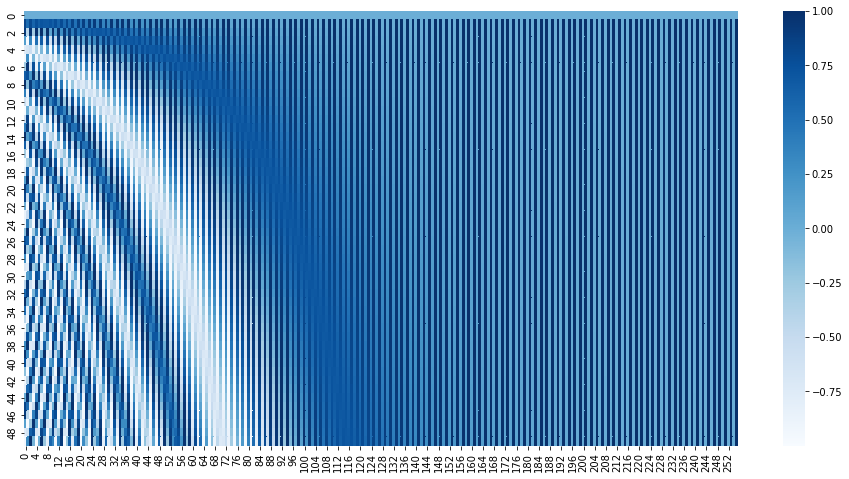

In [ ]:
pe = position_encoding_init(50, 256).numpy()
plt.figure(figsize=(16,8))
sns.heatmap(pe, cmap='Blues')
plt.show()

縦軸が単語の位置を、横軸が成分の次元を表しており、濃淡が加算される値です。

ここでは最大系列長を50、隠れ層の次元数を256としました。

#### ② Multihead Attention
ソース・ターゲット注意機構と自己注意機構
Attentionは一般に、queryベクトルとkeyベクトルの類似度を求めて、その正規化した重みをvalueベクトルに適用して値を取り出す処理を行います。

一般的な翻訳モデルで用いられるAttentionはソース・ターゲット注意機構と呼ばれ、この場合queryはDecoderの隠れ状態(Target)、keyはEncoderの隠れ状態(Source)、valueもEncoderの隠れ状態(Source)で表現されるのが一般的です。モデル全体の図では、右側のDecoderブロックの中央にあるAttentionがこれに相当します。

Transformerでは、このソース・ターゲット注意機構に加えて、query,key,valueを同じ系列内で定義する自己注意機構を用います。これにより、ある単語位置の出力を求める際にあらゆる位置を参照できるため、局所的な位置しか参照できない畳み込み層よりも良い性能を発揮できると言われています。モデル全体の図では、左側のEncoderブロックと右側のDecoderブロックの下部にあるAttentionがこれに当たります。

Transformerでは、Scaled Dot-Product Attentionと呼ばれるAttentionを、複数のヘッドで並列に扱うMulti-Head Attentionによって、Source-Target-AttentionとSelf-Attentionを実現します。

#### Scaled Dot-Product Attention
Attentionには、注意の重みを隠れ層 1 つのフィードフォワードネットワークで求めるAdditive Attentionと、注意の重みを内積で求めるDot-Product Attentionが存在します。  一般に、Dot-Product Attentionのほうがパラメータが少なく高速であり、Transformerでもこちらを使います。


Tranformerではさらなる工夫として、query($Q$)とkey($K$)の内積をスケーリング因子 $\sqrt{d_k}$ で除算します。

$Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$ 


これは、$d_k$（keyベクトルの次元数）が大きい場合に内積が大きくなりすぎて逆伝播のsoftmaxの勾配が極端に小さくなることを防ぐ役割を果たします。

In [ ]:
class ScaledDotProductAttention(nn.Module):
    
    def __init__(self, d_model, attn_dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param attn_dropout: float, ドロップアウト率
        """
        super(ScaledDotProductAttention, self).__init__()
        self.temper = np.power(d_model, 0.5)  # スケーリング因子
        self.dropout = nn.Dropout(attn_dropout)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, q, k, v, attn_mask):
        """
        :param q: torch.tensor, queryベクトル, 
            size=(n_head*batch_size, len_q, d_model/n_head)
        :param k: torch.tensor, key, 
            size=(n_head*batch_size, len_k, d_model/n_head)
        :param v: torch.tensor, valueベクトル, 
            size=(n_head*batch_size, len_v, d_model/n_head)
        :param attn_mask: torch.tensor, Attentionに適用するマスク, 
            size=(n_head*batch_size, len_q, len_k)
        :return output: 出力ベクトル, 
            size=(n_head*batch_size, len_q, d_model/n_head)
        :return attn: Attention
            size=(n_head*batch_size, len_q, len_k)
        """
        # QとKの内積でAttentionの重みを求め、スケーリングする
        attn = torch.bmm(q, k.transpose(1, 2)) / self.temper  # (n_head*batch_size, len_q, len_k)
        # Attentionをかけたくない部分がある場合は、その部分を負の無限大に飛ばしてSoftmaxの値が0になるようにする
        attn.data.masked_fill_(attn_mask, -float('inf'))
        
        attn = self.softmax(attn)
        attn = self.dropout(attn)
        output = torch.bmm(attn, v)

        return output, attn

#### Multi-Head Attention
TransformerではAttentionを複数のヘッドで並列に行うMulti-Head Attentionを採用しています。

複数のヘッドでAttentionを行うことにより、各ヘッドが異なる部分空間を処理でき、精度が向上するとされています。

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, n_head, d_model, d_k, d_v, dropout=0.1):
        """
        :param n_head: int, ヘッド数
        :param d_model: int, 隠れ層の次元数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(MultiHeadAttention, self).__init__()

        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v

        # 各ヘッドごとに異なる重みで線形変換を行うための重み
        # nn.Parameterを使うことで、Moduleのパラメータとして登録できる. TFでは更新が必要な変数はtf.Variableでラップするのでわかりやすい
        self.w_qs = nn.Parameter(torch.empty([n_head, d_model, d_k], dtype=torch.float))
        self.w_ks = nn.Parameter(torch.empty([n_head, d_model, d_k], dtype=torch.float))
        self.w_vs = nn.Parameter(torch.empty([n_head, d_model, d_v], dtype=torch.float))
        # nn.init.xavier_normal_で重みの値を初期化
        nn.init.xavier_normal_(self.w_qs)
        nn.init.xavier_normal_(self.w_ks)
        nn.init.xavier_normal_(self.w_vs)

        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = nn.LayerNorm(d_model) # 各層においてバイアスを除く活性化関数への入力を平均０、分散１に正則化
        self.proj = nn.Linear(n_head*d_v, d_model)  # 複数ヘッド分のAttentionの結果を元のサイズに写像するための線形層
        # nn.init.xavier_normal_で重みの値を初期化
        nn.init.xavier_normal_(self.proj.weight)
        
        self.dropout = nn.Dropout(dropout)


    def forward(self, q, k, v, attn_mask=None):
        """
        :param q: torch.tensor, queryベクトル, 
            size=(batch_size, len_q, d_model)
        :param k: torch.tensor, key, 
            size=(batch_size, len_k, d_model)
        :param v: torch.tensor, valueベクトル, 
            size=(batch_size, len_v, d_model)
        :param attn_mask: torch.tensor, Attentionに適用するマスク, 
            size=(batch_size, len_q, len_k)
        :return outputs: 出力ベクトル, 
            size=(batch_size, len_q, d_model)
        :return attns: Attention
            size=(n_head*batch_size, len_q, len_k)
            
        """
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        # residual connectionのための入力 出力に入力をそのまま加算する
        residual = q

        batch_size, len_q, d_model = q.size()
        batch_size, len_k, d_model = k.size()
        batch_size, len_v, d_model = v.size()

        # 複数ヘッド化
        # torch.repeat または .repeatで指定したdimに沿って同じテンソルを作成
        q_s = q.repeat(n_head, 1, 1) # (n_head*batch_size, len_q, d_model)
        k_s = k.repeat(n_head, 1, 1) # (n_head*batch_size, len_k, d_model)
        v_s = v.repeat(n_head, 1, 1) # (n_head*batch_size, len_v, d_model)
        # ヘッドごとに並列計算させるために、n_headをdim=0に、batch_sizeをdim=1に寄せる
        q_s = q_s.view(n_head, -1, d_model) # (n_head, batch_size*len_q, d_model)
        k_s = k_s.view(n_head, -1, d_model) # (n_head, batch_size*len_k, d_model)
        v_s = v_s.view(n_head, -1, d_model) # (n_head, batch_size*len_v, d_model)

        # 各ヘッドで線形変換を並列計算(p16左側`Linear`)
        q_s = torch.bmm(q_s, self.w_qs)  # (n_head, batch_size*len_q, d_k)
        k_s = torch.bmm(k_s, self.w_ks)  # (n_head, batch_size*len_k, d_k)
        v_s = torch.bmm(v_s, self.w_vs)  # (n_head, batch_size*len_v, d_v)
        # Attentionは各バッチ各ヘッドごとに計算させるためにbatch_sizeをdim=0に寄せる
        q_s = q_s.view(-1, len_q, d_k)   # (n_head*batch_size, len_q, d_k)
        k_s = k_s.view(-1, len_k, d_k)   # (n_head*batch_size, len_k, d_k)
        v_s = v_s.view(-1, len_v, d_v)   # (n_head*batch_size, len_v, d_v)

        # Attentionを計算(p16.左側`Scaled Dot-Product Attention * h`)
        outputs, attns = self.attention(q_s, k_s, v_s, attn_mask=attn_mask.repeat(n_head, 1, 1))

        # 各ヘッドの結果を連結(p16左側`Concat`)
        # torch.splitでbatch_sizeごとのn_head個のテンソルに分割
        outputs = torch.split(outputs, batch_size, dim=0)  # (batch_size, len_q, d_model) * n_head
        # dim=-1で連結
        outputs = torch.cat(outputs, dim=-1)  # (batch_size, len_q, d_model*n_head)

        # residual connectionのために元の大きさに写像(p16左側`Linear`)
        outputs = self.proj(outputs)  # (batch_size, len_q, d_model)
        outputs = self.dropout(outputs)
        outputs = self.layer_norm(outputs + residual)

        return outputs, attns

#### ③ Position-Wise Feed Forward Network
単語列の位置ごとに独立して処理する2層のネットワークであるPosition-Wise Feed Forward Networkを定義します。

In [ ]:
class PositionwiseFeedForward(nn.Module):
    """
    :param d_hid: int, 隠れ層1層目の次元数
    :param d_inner_hid: int, 隠れ層2層目の次元数
    :param dropout: float, ドロップアウト率
    """
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        # window size 1のconv層を定義することでPosition wiseな全結合層を実現する.
        self.w_1 = nn.Conv1d(d_hid, d_inner_hid, 1)
        self.w_2 = nn.Conv1d(d_inner_hid, d_hid, 1)
        self.layer_norm = nn.LayerNorm(d_hid)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        :param x: torch.tensor,
            size=(batch_size, max_length, d_hid)
        :return: torch.tensor,
            size=(batch_size, max_length, d_hid) 
        """
        residual = x
        output = self.relu(self.w_1(x.transpose(1, 2)))
        output = self.w_2(output).transpose(2, 1)
        output = self.dropout(output)
        return self.layer_norm(output + residual)

#### ④ Masking
TransformerではAttentionに対して２つのマスクを定義します。

一つはkey側の系列のPADトークンに対してAttentionを行わないようにするマスクです。

In [ ]:
def get_attn_padding_mask(seq_q, seq_k):
    """
    keyのPADに対するattentionを0にするためのマスクを作成する
    :param seq_q: tensor, queryの系列, size=(batch_size, len_q)
    :param seq_k: tensor, keyの系列, size=(batch_size, len_k)
    :return pad_attn_mask: tensor, size=(batch_size, len_q, len_k)
    """
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    pad_attn_mask = seq_k.data.eq(PAD).unsqueeze(1)   # (N, 1, len_k) PAD以外のidを全て0にする
    pad_attn_mask = pad_attn_mask.expand(batch_size, len_q, len_k) # (N, len_q, len_k)
    return pad_attn_mask

In [ ]:
_seq_q = torch.tensor([[1, 2, 3]])
_seq_k = torch.tensor([[4, 5, 6, 7, PAD]])
_mask = get_attn_padding_mask(_seq_q, _seq_k)  # 行がquery、列がkeyに対応し、key側がPAD(=0)の時刻だけ1で他が0の行列ができる
print('query:\n', _seq_q)
print('key:\n', _seq_k)
print('mask:\n', _mask)

query:
 tensor([[1, 2, 3]])
key:
 tensor([[4, 5, 6, 7, 0]])
mask:
 tensor([[[0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1]]], dtype=torch.uint8)


もう一つはDecoder側でSelf Attentionを行う際に、各時刻で未来の情報に対するAttentionを行わないようにするマスクです。

In [ ]:
def get_attn_subsequent_mask(seq):
    """
    未来の情報に対するattentionを0にするためのマスクを作成する
    :param seq: tensor, size=(batch_size, length)
    :return subsequent_mask: tensor, size=(batch_size, length, length)
    """
    attn_shape = (seq.size(1), seq.size(1))
    # 上三角行列(diagonal=1: 対角線より上が1で下が0)
    subsequent_mask = torch.triu(torch.ones(attn_shape, dtype=torch.uint8, device=device), diagonal=1)
    subsequent_mask = subsequent_mask.repeat(seq.size(0), 1, 1)
    return subsequent_mask

In [ ]:
_seq = torch.tensor([[1,2,3,4]])
_mask = get_attn_subsequent_mask(_seq)  # 行がquery、列がkeyに対応し、queryより未来のkeyの値が1で他は0の行列ができいる
print('seq:\n', _seq)
print('mask:\n', _mask)

seq:
 tensor([[1, 2, 3, 4]])
mask:
 tensor([[[0, 1, 1, 1],
         [0, 0, 1, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 0]]], dtype=torch.uint8)


### 3. モデルの定義

### Encoder
これまで定義してきたサブレイヤーを統合して、Encoderを定義します。

EncoderではSelf AttentionとPosition-Wise Feed Forward Networkからなるブロックを複数層繰り返すので、ブロックのクラスEncoderLayerを定義した後にEncoderを定義します。

In [ ]:
class EncoderLayer(nn.Module):
    """Encoderのブロックのクラス"""
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(EncoderLayer, self).__init__()
        # Encoder内のSelf-Attention
        self.slf_attn = MultiHeadAttention(
            n_head, d_model, d_k, d_v, dropout=dropout)
        # Postionwise FFN
        self.pos_ffn = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)

    def forward(self, enc_input, slf_attn_mask=None):
        """
        :param enc_input: tensor, Encoderの入力, 
            size=(batch_size, max_length, d_model)
        :param slf_attn_mask: tensor, Self Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :return enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :return enc_slf_attn: tensor, EncoderのSelf Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        """
        # Self-Attentionのquery, key, valueにはすべてEncoderの入力（enc_input）が入る
        enc_output, enc_slf_attn = self.slf_attn(
            enc_input, enc_input, enc_input, attn_mask=slf_attn_mask)
        enc_output = self.pos_ffn(enc_output)
        return enc_output, enc_slf_attn

In [ ]:
class Encoder(nn.Module):
    """EncoderLayerブロックからなるEncoderのクラス"""
    def __init__(
            self, n_src_vocab, max_length, n_layers=6, n_head=8, d_k=64, d_v=64,
            d_word_vec=512, d_model=512, d_inner_hid=1024, dropout=0.1):
        """
        :param n_src_vocab: int, 入力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        """
        super(Encoder, self).__init__()

        n_position = max_length + 1
        self.max_length = max_length
        self.d_model = d_model

        # Positional Encodingを用いたEmbedding
        self.position_enc = nn.Embedding(n_position, d_word_vec, padding_idx=PAD)
        self.position_enc.weight.data = position_encoding_init(n_position, d_word_vec)

        # 一般的なEmbedding
        self.src_word_emb = nn.Embedding(n_src_vocab, d_word_vec, padding_idx=PAD)

        # EncoderLayerをn_layers個積み重ねる
        self.layer_stack = nn.ModuleList([
            EncoderLayer(d_model, d_inner_hid, n_head, d_k, d_v, dropout=dropout)
            for _ in range(n_layers)])

    def forward(self, src_seq, src_pos):
        """
        :param src_seq: tensor, 入力系列, 
            size=(batch_size, max_length)
        :param src_pos: tensor, 入力系列の各単語の位置情報,
            size=(batch_size, max_length)
        :return enc_output: tensor, Encoderの最終出力, 
            size=(batch_size, max_length, d_model)
        :return enc_slf_attns: list, EncoderのSelf Attentionの行列のリスト
        """
        # 一般的な単語のEmbeddingを行う
        enc_input = self.src_word_emb(src_seq)
        # Positional EncodingのEmbeddingを加算する
        enc_input += self.position_enc(src_pos)

        enc_slf_attns = []
        enc_output = enc_input
        # key(=enc_input)のPADに対応する部分のみ1のマスクを作成
        enc_slf_attn_mask = get_attn_padding_mask(src_seq, src_seq)

        # n_layers個のEncoderLayerに入力を通す
        for enc_layer in self.layer_stack:
            enc_output, enc_slf_attn = enc_layer(
                enc_output, slf_attn_mask=enc_slf_attn_mask)
            enc_slf_attns += [enc_slf_attn]

        return enc_output, enc_slf_attns

#### Decoder

Deocoderも同様にSelf Attention, Source-Target Attention, Position-Wise Feed Forward Networkからなるブロックを複数層繰り返ので、ブロックのクラスDecoderLayerを定義した後にDecoderを定義します。

In [ ]:
class DecoderLayer(nn.Module):
    """Decoderのブロックのクラス"""
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(DecoderLayer, self).__init__()
        # Decoder内のSelf-Attention
        self.slf_attn = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        # Encoder-Decoder間のSource-Target Attention
        self.enc_attn = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        # Positionwise FFN
        self.pos_ffn = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)

    def forward(self, dec_input, enc_output, slf_attn_mask=None, dec_enc_attn_mask=None):
        """
        :param dec_input: tensor, Decoderの入力, 
            size=(batch_size, max_length, d_model)
        :param enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :param slf_attn_mask: tensor, Self Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :param dec_enc_attn_mask: tensor, Soutce-Target Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :return dec_output: tensor, Decoderの出力, 
            size=(batch_size, max_length, d_model)
        :return dec_slf_attn: tensor, DecoderのSelf Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        :return dec_enc_attn: tensor, DecoderのSoutce-Target Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        """
        # Self-Attentionのquery, key, valueにはすべてDecoderの入力（dec_input）が入る
        dec_output, dec_slf_attn = self.slf_attn(
            dec_input, dec_input, dec_input, attn_mask=slf_attn_mask)
        # Source-Target-AttentionのqueryにはDecoderの出力(dec_output), key, valueにはEncoderの出力（enc_output）が入る
        dec_output, dec_enc_attn = self.enc_attn(
            dec_output, enc_output, enc_output, attn_mask=dec_enc_attn_mask)
        dec_output = self.pos_ffn(dec_output)

        return dec_output, dec_slf_attn, dec_enc_attn

In [ ]:
class Decoder(nn.Module):
    """DecoderLayerブロックからなるDecoderのクラス"""
    def __init__(
            self, n_tgt_vocab, max_length, n_layers=6, n_head=8, d_k=64, d_v=64,
            d_word_vec=512, d_model=512, d_inner_hid=1024, dropout=0.1):
        """
        :param n_tgt_vocab: int, 出力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        """
        super(Decoder, self).__init__()
        n_position = max_length + 1
        self.max_length = max_length
        self.d_model = d_model

        # Positional Encodingを用いたEmbedding
        self.position_enc = nn.Embedding(
            n_position, d_word_vec, padding_idx=PAD)
        self.position_enc.weight.data = position_encoding_init(n_position, d_word_vec)

        # 一般的なEmbedding
        self.tgt_word_emb = nn.Embedding(
            n_tgt_vocab, d_word_vec, padding_idx=PAD)
        self.dropout = nn.Dropout(dropout)

        # DecoderLayerをn_layers個積み重ねる
        self.layer_stack = nn.ModuleList([
            DecoderLayer(d_model, d_inner_hid, n_head, d_k, d_v, dropout=dropout)
            for _ in range(n_layers)])

    def forward(self, tgt_seq, tgt_pos, src_seq, enc_output):
        """
        :param tgt_seq: tensor, 出力系列, 
            size=(batch_size, max_length)
        :param tgt_pos: tensor, 出力系列の各単語の位置情報,
            size=(batch_size, max_length)
        :param src_seq: tensor, 入力系列, 
            size=(batch_size, n_src_vocab)
        :param enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :return dec_output: tensor, Decoderの最終出力, 
            size=(batch_size, max_length, d_model)
        :return dec_slf_attns: list, DecoderのSelf Attentionの行列のリスト 
        :return dec_slf_attns: list, DecoderのSelf Attentionの行列のリスト
        """
        # 一般的な単語のEmbeddingを行う
        dec_input = self.tgt_word_emb(tgt_seq)
        # Positional EncodingのEmbeddingを加算する
        dec_input += self.position_enc(tgt_pos)

        # Self-Attention用のマスクを作成
        # key(=dec_input)のPADに対応する部分が1のマスクと、queryから見たkeyの未来の情報に対応する部分が1のマスクのORをとる
        dec_slf_attn_pad_mask = get_attn_padding_mask(tgt_seq, tgt_seq)  # (N, max_length, max_length)
        dec_slf_attn_sub_mask = get_attn_subsequent_mask(tgt_seq)  # (N, max_length, max_length)
        dec_slf_attn_mask = torch.gt(dec_slf_attn_pad_mask + dec_slf_attn_sub_mask, 0)  # ORをとる

        # key(=dec_input)のPADに対応する部分のみ1のマスクを作成
        dec_enc_attn_pad_mask = get_attn_padding_mask(tgt_seq, src_seq)  # (N, max_length, max_length)

        dec_slf_attns, dec_enc_attns = [], []

        dec_output = dec_input
        # n_layers個のDecoderLayerに入力を通す
        for dec_layer in self.layer_stack:
            dec_output, dec_slf_attn, dec_enc_attn = dec_layer(
                dec_output, enc_output,
                slf_attn_mask=dec_slf_attn_mask,
                dec_enc_attn_mask=dec_enc_attn_pad_mask)

            dec_slf_attns += [dec_slf_attn]
            dec_enc_attns += [dec_enc_attn]

        return dec_output, dec_slf_attns, dec_enc_attns

In [ ]:
class Transformer(nn.Module):
    """Transformerのモデル全体のクラス"""
    def __init__(
            self, n_src_vocab, n_tgt_vocab, max_length, n_layers=6, n_head=8,
            d_word_vec=512, d_model=512, d_inner_hid=1024, d_k=64, d_v=64,
            dropout=0.1, proj_share_weight=True):
        """
        :param n_src_vocab: int, 入力言語の語彙数
        :param n_tgt_vocab: int, 出力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        :param proj_share_weight: bool, 出力言語の単語のEmbeddingと出力の写像で重みを共有する        
        """
        super(Transformer, self).__init__()
        self.encoder = Encoder(
            n_src_vocab, max_length, n_layers=n_layers, n_head=n_head,
            d_word_vec=d_word_vec, d_model=d_model,
            d_inner_hid=d_inner_hid, dropout=dropout)
        self.decoder = Decoder(
            n_tgt_vocab, max_length, n_layers=n_layers, n_head=n_head,
            d_word_vec=d_word_vec, d_model=d_model,
            d_inner_hid=d_inner_hid, dropout=dropout)
        self.tgt_word_proj = nn.Linear(d_model, n_tgt_vocab, bias=False)
        nn.init.xavier_normal_(self.tgt_word_proj.weight)
        self.dropout = nn.Dropout(dropout)

        assert d_model == d_word_vec  # 各モジュールの出力のサイズは揃える

        if proj_share_weight:
            # 出力言語の単語のEmbeddingと出力の写像で重みを共有する
            assert d_model == d_word_vec
            self.tgt_word_proj.weight = self.decoder.tgt_word_emb.weight

    def get_trainable_parameters(self):
        # Positional Encoding以外のパラメータを更新する
        enc_freezed_param_ids = set(map(id, self.encoder.position_enc.parameters()))
        dec_freezed_param_ids = set(map(id, self.decoder.position_enc.parameters()))
        freezed_param_ids = enc_freezed_param_ids | dec_freezed_param_ids
        return (p for p in self.parameters() if id(p) not in freezed_param_ids)

    def forward(self, src, tgt):
        src_seq, src_pos = src
        tgt_seq, tgt_pos = tgt

        src_seq = src_seq[:, 1:]
        src_pos = src_pos[:, 1:]
        tgt_seq = tgt_seq[:, :-1]
        tgt_pos = tgt_pos[:, :-1]

        enc_output, *_ = self.encoder(src_seq, src_pos)
        dec_output, *_ = self.decoder(tgt_seq, tgt_pos, src_seq, enc_output)
        seq_logit = self.tgt_word_proj(dec_output)

        return seq_logit

### 4. 学習

In [ ]:
def compute_loss(batch_X, batch_Y, model, criterion, optimizer=None, is_train=True):
    # バッチの損失を計算
    model.train(is_train)
    
    pred_Y = model(batch_X, batch_Y)
    gold = batch_Y[0][:, 1:].contiguous()
#     gold = batch_Y[0].contiguous()
    loss = criterion(pred_Y.view(-1, pred_Y.size(2)), gold.view(-1))

    if is_train:  # 訓練時はパラメータを更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    gold = gold.data.cpu().numpy().tolist()
    pred = pred_Y.max(dim=-1)[1].data.cpu().numpy().tolist()

    return loss.item(), gold, pred

In [ ]:
MAX_LENGTH = 20
batch_size = 64
num_epochs = 15
lr = 0.001
ckpt_path = 'transformer.pth'
max_length = MAX_LENGTH + 2

In [ ]:
model_args = {
    'n_src_vocab': vocab_size_X,
    'n_tgt_vocab': vocab_size_Y,
    'max_length': max_length,
    'proj_share_weight': True,
    'd_k': 32,
    'd_v': 32,
    'd_model': 128,
    'd_word_vec': 128,
    'd_inner_hid': 256,
    'n_layers': 3,
    'n_head': 6,
    'dropout': 0.1,
}

In [ ]:
# DataLoaderやモデルを定義
train_dataloader = DataLoader(
    train_X, train_Y, batch_size
    )
valid_dataloader = DataLoader(
    valid_X, valid_Y, batch_size, 
    shuffle=False
    )

model = Transformer(**model_args).to(device)

optimizer = optim.Adam(model.get_trainable_parameters(), lr=lr)

criterion = nn.CrossEntropyLoss(ignore_index=PAD, size_average=False).to(device)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
def calc_bleu(refs, hyps):
    """
    BLEUスコアを計算する関数
    :param refs: list, 参照訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :param hyps: list, モデルの生成した訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :return: float, BLEUスコア(0~100)
    """
    refs = [[ref[:ref.index(EOS)]] for ref in refs]
    hyps = [hyp[:hyp.index(EOS)] if EOS in hyp else hyp for hyp in hyps]
    return 100 * bleu_score.corpus_bleu(refs, hyps)

In [ ]:
# 訓練
best_valid_bleu = 0.

for epoch in range(1, num_epochs+1):
    start = time.time()
    train_loss = 0.
    train_refs = []
    train_hyps = []
    valid_loss = 0.
    valid_refs = []
    valid_hyps = []
    # train
    for batch in train_dataloader:
        batch_X, batch_Y = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, model, criterion, optimizer, is_train=True
            )
        train_loss += loss
        train_refs += gold
        train_hyps += pred
    # valid
    for batch in valid_dataloader:
        batch_X, batch_Y = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, model, criterion, is_train=False
            )
        valid_loss += loss
        valid_refs += gold
        valid_hyps += pred
    # 損失をサンプル数で割って正規化
    train_loss /= len(train_dataloader.data) 
    valid_loss /= len(valid_dataloader.data) 
    # BLEUを計算
    train_bleu = calc_bleu(train_refs, train_hyps)
    valid_bleu = calc_bleu(valid_refs, valid_hyps)

    # validationデータでBLEUが改善した場合にはモデルを保存
    if valid_bleu > best_valid_bleu:
        ckpt = model.state_dict()
        torch.save(ckpt, ckpt_path)
        best_valid_bleu = valid_bleu

    elapsed_time = (time.time()-start) / 60
    print('Epoch {} [{:.1f}min]: train_loss: {:5.2f}  train_bleu: {:2.2f}  valid_loss: {:5.2f}  valid_bleu: {:2.2f}'.format(
            epoch, elapsed_time, train_loss, train_bleu, valid_loss, valid_bleu))
    print('-'*80)

Epoch 1 [7.4min]: train_loss: 71.15  train_bleu: 4.83  valid_loss: 38.56  valid_bleu: 10.17
--------------------------------------------------------------------------------
Epoch 2 [7.4min]: train_loss: 36.62  train_bleu: 11.31  valid_loss: 29.96  valid_bleu: 16.23
--------------------------------------------------------------------------------
Epoch 3 [7.4min]: train_loss: 29.72  train_bleu: 16.52  valid_loss: 25.94  valid_bleu: 21.15
--------------------------------------------------------------------------------
Epoch 4 [7.4min]: train_loss: 26.13  train_bleu: 20.31  valid_loss: 23.84  valid_bleu: 23.76
--------------------------------------------------------------------------------
Epoch 5 [7.4min]: train_loss: 23.78  train_bleu: 23.05  valid_loss: 22.39  valid_bleu: 25.62
--------------------------------------------------------------------------------
Epoch 6 [7.3min]: train_loss: 22.09  train_bleu: 25.32  valid_loss: 21.31  valid_bleu: 27.93
--------------------------------------

### 5. 評価

In [ ]:
def test(model, src, max_length=20):
    # 学習済みモデルで系列を生成する
    model.eval()
    
    src_seq, src_pos = src
    batch_size = src_seq.size(0)
    enc_output, enc_slf_attns = model.encoder(src_seq, src_pos)
        
    tgt_seq = torch.full([batch_size, 1], BOS, dtype=torch.long, device=device)
    tgt_pos = torch.arange(1, dtype=torch.long, device=device)
    tgt_pos = tgt_pos.unsqueeze(0).repeat(batch_size, 1)

    # 時刻ごとに処理
    for t in range(1, max_length+1):
        dec_output, dec_slf_attns, dec_enc_attns = model.decoder(
            tgt_seq, tgt_pos, src_seq, enc_output)
        dec_output = model.tgt_word_proj(dec_output)
        out = dec_output[:, -1, :].max(dim=-1)[1].unsqueeze(1)
        # 自身の出力を次の時刻の入力にする
        tgt_seq = torch.cat([tgt_seq, out], dim=-1)
        tgt_pos = torch.arange(t+1, dtype=torch.long, device=device)
        tgt_pos = tgt_pos.unsqueeze(0).repeat(batch_size, 1)

    return tgt_seq[:, 1:], enc_slf_attns, dec_slf_attns, dec_enc_attns

In [ ]:
def ids_to_sentence(vocab, ids):
    # IDのリストを単語のリストに変換する
    return [vocab.id2word[_id] for _id in ids]

def trim_eos(ids):
    # IDのリストからEOS以降の単語を除外する
    if EOS in ids:
        return ids[:ids.index(EOS)]
    else:
        return ids

In [ ]:
# 学習済みモデルの読み込み
model = Transformer(**model_args).to(device)
ckpt = torch.load(ckpt_path)
model.load_state_dict(ckpt)

In [ ]:
# テストデータの読み込み
test_X = load_data('./data/dev.en')
test_Y = load_data('./data/dev.ja')
test_X = [sentence_to_ids(vocab_X, sentence) for sentence in test_X]
test_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in test_Y]

#### 生成

In [ ]:
test_dataloader = DataLoader(
    test_X, test_Y, 1,
    shuffle=False
    )

In [ ]:
src, tgt = next(test_dataloader)

src_ids = src[0][0].cpu().numpy()
tgt_ids = tgt[0][0].cpu().numpy()

print('src: {}'.format(' '.join(ids_to_sentence(vocab_X, src_ids[1:-1]))))
print('tgt: {}'.format(' '.join(ids_to_sentence(vocab_Y, tgt_ids[1:-1]))))

preds, enc_slf_attns, dec_slf_attns, dec_enc_attns = test(model, src)
pred_ids = preds[0].data.cpu().numpy().tolist()
print('out: {}'.format(' '.join(ids_to_sentence(vocab_Y, trim_eos(pred_ids)))))

src: your own business .
tgt: の 事 を しろ 。
out: 。 あなた の お 世話 を し て くださ い 。


### BLEUの評価

In [ ]:
# BLEUの評価
test_dataloader = DataLoader(
    test_X, test_Y, 128,
    shuffle=False
    )
refs_list = []
hyp_list = []

for batch in test_dataloader:
    batch_X, batch_Y = batch
    preds, *_ = test(model, batch_X)
    preds = preds.data.cpu().numpy().tolist()
    refs = batch_Y[0].data.cpu().numpy()[:, 1:].tolist()
    refs_list += refs
    hyp_list += preds
bleu = calc_bleu(refs_list, hyp_list)
print(bleu)

17.49735826549578


# Section6: 物体検知・セグメンテーション

### 要点のまとめ

- 物体認識タスクの出力 <br>
  - 分類:クラスラベル
  - 物体検知:Bounding box
  - 意味領域分割:各ピクセルに対して単一のクラスラベル
  - 個体領域分割:各ピクセルに対して単一のクラスラベル
- 代表的なデータセットとして、VOC12やOICOD18などがある。試したいモデルに応じて選択する
- 評価指標
  - IoU <br>
    物体検知ではクラスラベルだけでなく、物体位置の予測精度も評価したい
$$ IoU = \frac{Area \  of \ Overlap}{Area \ of \ Union} $$
    Confusion Matrixの要素で表現:
$$ IoU = \frac{TP}{TP \ + \ FP \ + \ FN} $$

  - AP <br>
    conf.の閾値をβとするとき、Recall = R(β)、Precision = P(β)とすると、
$$ AP = \int_0^1 P(R)dR  $$

  - mAP <br>
    APがクラスごとに求める値から全クラスの平均を算出
$$ mAP = \frac{1}{C} \sum_{i=1}^C AP_i $$

  - FPS <br>
    物体検知では応用上の要請から、検出精度に加え検出速度も問題となる

- 2012年のAlexNetの登場を皮切りに、時代はSIFTからDCNNへ発展していった
  - 物体検知のフレームワークは2段階検出器と1段階検出器がそれぞれ進化進化
  - 2段階検出器
    - 候補領域の検出とクラス推定を別々に行う
    - 相対的に精度が高い
    - 相対的に計算量が大きく推論も遅い
  - 1段階検出器
    - 候補領域の検出とクラス推定を同時に行う
    - 相対的に精度が低い
    - 相対的に計算量が小さく推論も早い
  - SSD
    - VGG16をベースとする1段階検出器
    - VGG16のFC層2層をCOnv層に変更
    - 解像度の異なる特徴マップからの出力を作るというマルチスケール特徴マップがSSDの特徴
  - Semantic Segmentation
    - 元の画像と同じ解像度に戻すUp-samplingの壁が肝肝
    - FCNでは低レイヤーPooling層の出力をelement-wise additionすることでローカルな情報を補完してUp-samplingする
    - U-NetはFCNと異なり、Skip-connectionとUp-samplingによる値をチャネル方向に結合する
    - Convolutionの段階で受容野を拡大する工夫として、Dilated Convolutionがある 